# Protein Creation Process

The purpose of this tutorial is to show the COBRAme process of creating a reaction from it's DNA. An overivew of teh process is shown below.

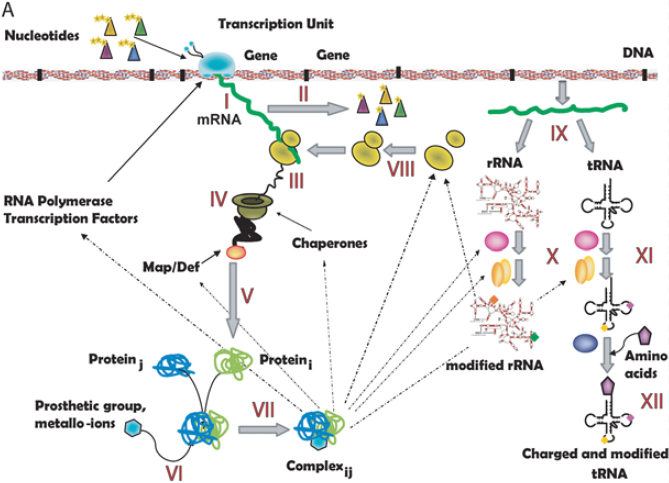

**Content of the ‘E-matrix’.** (A) Schematic representation of the network components and reactions is shown. In addition to the macromolecular synthesis of RNA and proteins, rRNA and tRNA processing reactions were included in the reconstruction. I: Transcription; II: mRNA degradation; III: translation; IV: protein maturation; V: protein folding; VI: metallo-ion binding; VII: protein complex formation; VIII: ribosome assembly; IX: RNA processing; X: rRNA modification; XI: tRNA modification; XII: tRNA charging (see Table 1 for complete list of subsystems and Figure S1 for a complete protein map). 

Image found in "Thiele I, Jamshidi N, Fleming RMT, Palsson BØ (2009) Genome-Scale Reconstruction of Escherichia coli’s Transcriptional and Translational Machinery: A Knowledge Base, Its Mathematical Formulation, and Its Functional Characterization. PLoS Comput Biol 5(3): e1000312. doi:10.1371/journal.pcbi.1000312"

## 1. Load Key COBRAme Packages

Load the python packages that will be required for this tutorial.

In [1]:
from __future__ import print_function, division, absolute_import

# python imports
import re
from os.path import join
from collections import defaultdict
import pickle
import pandas as pd

# third party imports
import pandas
import tabulate
import cobra
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',100)
pd.set_option('display.max_colwidth',100)

# ECOLIme
import ecolime
from ecolime import (transcription, translation, flat_files, generics, formulas, compartments)

# COBRAme
import cobrame
from cobrame.util import building, mu, me_model_interface
#from cobrame.io.json import save_json_me_model, save_reduced_json_me_model

C:\Users\hinton\anaconda3\envs\test4\lib\site-packages\cobra\solvers\__init__.py:63: UserWarning: No LP solvers found
  warn("No LP solvers found")
C:\Users\hinton\anaconda3\envs\test4\lib\site-packages\cobra\io\sbml3.py:24: UserWarning: Install lxml for faster SBML I/O
  warn("Install lxml for faster SBML I/O")
C:\Users\hinton\anaconda3\envs\test4\lib\site-packages\cobra\io\__init__.py:10: UserWarning: cobra.io.sbml requires libsbml
  warn("cobra.io.sbml requires libsbml")
C:\Users\hinton\Dropbox\COBRAme\cobrame\__init__.py:29 UserWarning: COBRApy version is 0.5.4. We recommend using 0.5.11. Using earlier versions may cause errors


## 2. Load the iJL1678b model

Load the iJL1678b model in pickle format that is located in the current directory.

In [2]:
with open('./me_models/iJL1678b.pickle', 'rb') as f:
    me = pickle.load(f)

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',100)
pd.set_option('display.max_colwidth',100)
pd.DataFrame({i: str(v) for i, v in me.__dict__.items()}, 
             index=['Attribute Values']).T

,Atribute Values
id,iJL1678b-ME
name,None
notes,{}
annotation,{}
_trimmed,False
_trimmed_genes,[]
_trimmed_reactions,{}
genes,[]
reactions,"[<SummaryVariable biomass_dilution at 0x1d71a67f6d0>, <SummaryVariable protein_biomass_to_biomas..."
metabolites,"[<Constraint biomass at 0x1d71a67ffd0>, <Constraint protein_biomass at 0x1d71a60a7f0>, <Constrai..."


The attributes of the ME model can be listed by attaching the name of the attribute to the name of the ME model preceeded by a "." Below are a couple of examples showing the reactions of the model and the global-info.

In [4]:
me.reactions

[<SummaryVariable biomass_dilution at 0x1d71a67f6d0>,
 <SummaryVariable protein_biomass_to_biomass at 0x1d71a60a970>,
 <SummaryVariable mRNA_biomass_to_biomass at 0x1d71a60a070>,
 <SummaryVariable tRNA_biomass_to_biomass at 0x1d71a60a8b0>,
 <SummaryVariable rRNA_biomass_to_biomass at 0x1d71a60ae50>,
 <SummaryVariable ncRNA_biomass_to_biomass at 0x1d71a60a790>,
 <SummaryVariable DNA_biomass_to_biomass at 0x1d71a60a550>,
 <SummaryVariable lipid_biomass_to_biomass at 0x1d71a60a1c0>,
 <SummaryVariable constituent_biomass_to_biomass at 0x1d71a692160>,
 <SummaryVariable prosthetic_group_biomass_to_biomass at 0x1d71a692d30>,
 <SummaryVariable peptidoglycan_biomass_to_biomass at 0x1d71a6920d0>,
 <MEReaction DM_4CRSOL at 0x1d71a6921f0>,
 <MEReaction DM_5DRIB at 0x1d71a692f70>,
 <MEReaction DM_AACALD at 0x1d71a692280>,
 <MEReaction DM_AMOB at 0x1d71a684130>,
 <MEReaction DM_MTHTHF at 0x1d71a6848b0>,
 <MEReaction DM_OXAM at 0x1d71a684d90>,
 <MEReaction EX_12ppd__R_e at 0x1d71a684dc0>,
 <MEReactio

In [5]:
me.global_info

{'kt': 4.5,
 'r0': 0.087,
 'k_deg': 12.0,
 'm_rr': 1453.0,
 'm_aa': 0.109,
 'f_rRNA': 0.86,
 'm_nt': 0.324,
 'f_mRNA': 0.02,
 'm_tRNA': 25.0,
 'f_tRNA': 0.12,
 'temperature': 37,
 'propensity_scaling': 0.45,
 'GC_fraction': 0.507896997096}

## 3. Simple Reaction Example

Let's begin with glucose-6-phosphate isomerase (PGI) which is a simple reaction that is composed of only one protein. The gene that creates this enzyme is b4025.Listing the attributes of the mRNA metabolite produced from the b4025 gene.

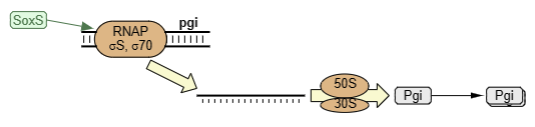
from https://www.ecocyc.org/gene?orgid=ECOLI&id=PGLUCISOM

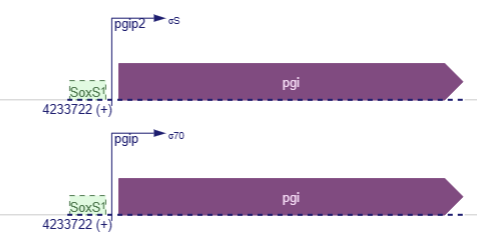
from https://www.ecocyc.org/gene?orgid=ECOLI&id=PGLUCISOM#tab=TU

Phosphoglucose isomerase catalyzes the interconversion of glucose-6-phosphate and fructose-6-phosphate, an essential step of the glycolysis and gluconeogenesis pathways. https://www.ecocyc.org/gene?orgid=ECOLI&id=PGLUCISOM

In [6]:
pd.DataFrame({i: str(v) for i, v in me.metabolites.RNA_b4025.__dict__.items()}, 
             index=['Attribute Values']).T

,Attribute Values
id,RNA_b4025
name,
notes,{}
annotation,{}
_model,iJL1678b-ME
_reaction,"{<TranslationReaction translation_b4025 at 0x1d742749100>, <TranscriptionReaction transcription_..."
formula,C15653H17725N6131O11597P1650
compartment,c
charge,None
_constraint_sense,E


Listing the reactions associated with the RNA_b4015 mRNA metabolite.

In [7]:
me.metabolites.RNA_b4025.reactions

frozenset({<MEReaction DM_RNA_b4025 at 0x1d743ccc0d0>,
           <TranscriptionReaction transcription_TU0_6444_from_RPOS_MONOMER at 0x1d73d4730d0>,
           <TranscriptionReaction transcription_TU0_6444_from_RpoD_mono at 0x1d73d473490>,
           <TranslationReaction translation_b4025 at 0x1d742749100>})

Note that there are two different TranscriptionReactions, transcription units (operons), that can produce the b4025 mRNA, a TranslationReaction convert the mRNA to a protein (Enzyme), and a MEReaction that manages the xxxx. They include:

1. transcription_TU0_6444_from_RPOS_MONOMER
2. transcription_TU0_6444_from_RpoD_mono
3. translation_b4025
4. DM_RNA_b4025

Each of these are descibed in more detail below.

### Convert DNA to mRNA metabolite:  transcription_TU0_6444_from_RPOS_MONOMER

The data stored for this transcriptional unit can be found by

In [8]:
rxn = me.reactions.transcription_TU0_6444_from_RPOS_MONOMER
data = rxn.transcription_data
pd.DataFrame({i: str(v) for i, v in data.__dict__.items()}, index=['Attribute Values']).T

,Attribute Values
id,TU0_6444_from_RPOS_MONOMER
_model,iJL1678b-ME
_parent_reactions,{'transcription_TU0_6444_from_RPOS_MONOMER'}
nucleotide_sequence,AAAGTCACAATTCTCAAAATCAGAAGAGTATTGCTAATGAAAAACATCAATCCAACGCAGACCGCTGCCTGGCAGGCACTACAGAAACACTTCGAT...
RNA_products,{'RNA_b4025'}
RNA_polymerase,RNAPS-CPLX
subreactions,"defaultdict(<class 'int'>, {'Transcription_normal_rho_dependent': 1})"


Note that this data includes

1. nucleotide sequence
2. RNA products
3. RNA polymerase used by this reaction
4. Subreactions required for operation

The attributes of this specific transcription reaction include:

In [9]:
rxn = me.reactions.get_by_id('transcription_TU0_6444_from_RPOS_MONOMER')
pd.DataFrame({i: str(v) for i, v in rxn.__dict__.items()}, index=['Attribute Values']).T

,Attribute Values
id,transcription_TU0_6444_from_RPOS_MONOMER
name,
notes,{}
annotation,{}
_gene_reaction_rule,
subsystem,
_genes,set()
_metabolites,"{<RNAP RNAPS-CPLX at 0x1d73bd73d30>: -0.00805718131069817*mu - 0.00315438648313833, <Transcribed..."
_model,iJL1678b-ME
_objective_coefficient,0.0


In [10]:
rxn = me.reactions.transcription_TU0_6444_from_RPOS_MONOMER
data = rxn.transcription_data
pd.DataFrame({i: str(v) for i, v in data.__dict__.items()}, index=['Attribute Values']).T

,Attribute Values
id,TU0_6444_from_RPOS_MONOMER
_model,iJL1678b-ME
_parent_reactions,{'transcription_TU0_6444_from_RPOS_MONOMER'}
nucleotide_sequence,AAAGTCACAATTCTCAAAATCAGAAGAGTATTGCTAATGAAAAACATCAATCCAACGCAGACCGCTGCCTGGCAGGCACTACAGAAACACTTCGAT...
RNA_products,{'RNA_b4025'}
RNA_polymerase,RNAPS-CPLX
subreactions,"defaultdict(<class 'int'>, {'Transcription_normal_rho_dependent': 1})"


The complete reaction for this transcription reaction is

In [11]:
me.reactions.get_by_id('transcription_TU0_6444_from_RPOS_MONOMER').reaction

'4.27350427350427e-6*mu GreA_mono + 4.27350427350427e-6*mu GreB_mono + 4.27350427350427e-6*mu Mfd_mono_mod_1:mg2 + 4.27350427350427e-6*mu NusA_mono + 4.27350427350427e-6*mu NusG_mono + 0.00805718131069817*mu + 0.00315438648313833 RNAPS-CPLX + 4.27350427350427e-6*mu Rho_hexa_mod_3:mg2 + 4.27350427350427e-6*mu RpoZ_mono_mod_1:mg2 + 390.0 atp_c + 427 ctp_c + 431 gtp_c + 3.0 h2o_c + 441 utp_c --> RNA_b4025 + 3.0 adp_c + 3.0 h_c + 528.39604875 mRNA_biomass + 3.0 pi_c + 1686 ppi_c'

The reactants can be listed by

In [12]:
me.reactions.get_by_id('transcription_TU0_6444_from_RPOS_MONOMER').reactants

[<RNAP RNAPS-CPLX at 0x1d73bd73d30>,
 <Complex Mfd_mono_mod_1:mg2 at 0x1d73bbdcd90>,
 <Complex NusA_mono at 0x1d73bbdcf10>,
 <Complex NusG_mono at 0x1d73bbdcf40>,
 <Complex GreA_mono at 0x1d73bbdcee0>,
 <Complex GreB_mono at 0x1d73bbdcf70>,
 <Complex RpoZ_mono_mod_1:mg2 at 0x1d73bbdcdc0>,
 <Complex Rho_hexa_mod_3:mg2 at 0x1d73bbdcdf0>,
 <Metabolite atp_c at 0x1d73bd291c0>,
 <Metabolite h2o_c at 0x1d73bd29220>,
 <Metabolite utp_c at 0x1d73bd292e0>,
 <Metabolite ctp_c at 0x1d73bd29310>,
 <Metabolite gtp_c at 0x1d73bd29340>]

The products can be listed as follows

In [13]:
me.reactions.get_by_id('transcription_TU0_6444_from_RPOS_MONOMER').products

[<TranscribedGene RNA_b4025 at 0x1d73d4732b0>,
 <Metabolite adp_c at 0x1d73bd29250>,
 <Metabolite pi_c at 0x1d73bd29280>,
 <Metabolite h_c at 0x1d73bd292b0>,
 <Metabolite ppi_c at 0x1d73bd29370>,
 <Constraint mRNA_biomass at 0x1d71a60acd0>]

In [14]:
me.reactions.get_by_id('transcription_TU0_6444_from_RPOS_MONOMER').transcription_data.subreactions

defaultdict(int, {'Transcription_normal_rho_dependent': 1})

Let's look at the details for the reactants required for 'transcription_TU0_6444_from_RPOS_MONOMER'

### RNA Polymerase: RNAPS-CPLEX

In [15]:
rxn = me.metabolites.get_by_id('RNAPS-CPLX')
pd.DataFrame({i: str(v) for i, v in rxn.__dict__.items()}, index=['Attribute Values']).T

,Attribute Values
id,RNAPS-CPLX
name,
notes,{}
annotation,{}
_model,iJL1678b-ME
_reaction,"{<TranscriptionReaction transcription_TU0_8148_from_RPOS_MONOMER at 0x1d73d240100>, <Transcripti..."
formula,C18332H29619Mg2N5166O5657S118Zn
compartment,c
charge,None
_constraint_sense,E


Lisitng all the reactions that require RNAPS-CPLEX. Note that most are transcription reactions

In [16]:
rxn.reactions

frozenset({<ComplexFormation formation_RNAPS-CPLX at 0x1d744fe6b20>,
           <TranscriptionReaction transcription_TU00025_from_RPOS_MONOMER at 0x1d73bdd6eb0>,
           <TranscriptionReaction transcription_TU00080_from_RPOS_MONOMER at 0x1d73d5905b0>,
           <TranscriptionReaction transcription_TU00097_from_RPOS_MONOMER at 0x1d73bed07f0>,
           <TranscriptionReaction transcription_TU00103_from_RPOS_MONOMER at 0x1d73bf92ca0>,
           <TranscriptionReaction transcription_TU00105_from_RPOS_MONOMER at 0x1d73bff7280>,
           <TranscriptionReaction transcription_TU00124_from_RPOS_MONOMER at 0x1d73d26e850>,
           <TranscriptionReaction transcription_TU00138_with_TERM21_from_RPOS_MONOMER at 0x1d73d3f2eb0>,
           <TranscriptionReaction transcription_TU00168_from_RPOS_MONOMER at 0x1d73bede610>,
           <TranscriptionReaction transcription_TU00198_from_RPOS_MONOMER at 0x1d73d0cf460>,
           <TranscriptionReaction transcription_TU00202_from_RPOS_MONOMER at 0x1d7

Listing the number of reactions that require RNAPS-CPLEX.

In [17]:
len(rxn.reactions)

86

In [18]:
rxn = me.reactions.get_by_id('formation_RNAPS-CPLX')
pd.DataFrame({i: str(v) for i, v in rxn.__dict__.items()}, index=['Attribute Values']).T

,Attribute Values
id,formation_RNAPS-CPLX
name,
notes,{}
annotation,{}
_gene_reaction_rule,
subsystem,
_genes,set()
_metabolites,"{<RNAP RNAPS-CPLX at 0x1d73bd73d30>: 1, <Complex RpoS_mono at 0x1d743e1bb80>: -1.0, <Complex hRN..."
_model,iJL1678b-ME
_objective_coefficient,0.0


List the metabolites found in formation_RNAPS-CPLX

In [19]:
rxn.metabolites

{<RNAP RNAPS-CPLX at 0x1d73bd73d30>: 1,
 <Complex RpoS_mono at 0x1d743e1bb80>: -1.0,
 <Complex hRNAP_mod_1:zn2_mod_2:mg2 at 0x1d743fd4f40>: -1.0}

In [20]:
rxn = me.metabolites.get_by_id('RpoS_mono')
pd.DataFrame({i: str(v) for i, v in rxn.__dict__.items()}, index=['Attribute Values']).T

,Attribute Values
id,RpoS_mono
name,
notes,{}
annotation,{}
_model,iJL1678b-ME
_reaction,"{<ComplexFormation formation_RNAPS-CPLX at 0x1d744fe6b20>, <ComplexFormation formation_RpoS_mono..."
formula,C1661H2674N483O524S5
compartment,c
charge,None
_constraint_sense,E


In [21]:
me.metabolites.get_by_id('RpoS_mono').reactions

frozenset({<ComplexFormation formation_RNAPS-CPLX at 0x1d744fe6b20>,
           <ComplexFormation formation_RpoS_mono at 0x1d743e1bb50>})

In [22]:
rxn = me.reactions.get_by_id('formation_RpoS_mono')
pd.DataFrame({i: str(v) for i, v in rxn.__dict__.items()}, index=['Attribute Values']).T

,Attribute Values
id,formation_RpoS_mono
name,
notes,{}
annotation,{}
_gene_reaction_rule,
subsystem,
_genes,set()
_metabolites,"{<Complex RpoS_mono at 0x1d743e1bb80>: 1, <TranslatedGene protein_b2741 at 0x1d7405c8f40>: -1.0}"
_model,iJL1678b-ME
_objective_coefficient,0.0


In [23]:
rxn = me.metabolites.get_by_id('hRNAP_mod_1:zn2_mod_2:mg2')
pd.DataFrame({i: str(v) for i, v in rxn.__dict__.items()}, index=['Attribute Values']).T

,Attribute Values
id,hRNAP_mod_1:zn2_mod_2:mg2
name,
notes,{}
annotation,{}
_model,iJL1678b-ME
_reaction,"{<ComplexFormation formation_RNAP54-CPLX at 0x1d744fe6a00>, <ComplexFormation formation_RNAP70-C..."
formula,C16671H26945Mg2N4683O5133S113Zn
compartment,c
charge,None
_constraint_sense,E


In [24]:
rxn.reactions

frozenset({<ComplexFormation formation_CPLX0-221 at 0x1d744fe69a0>,
           <ComplexFormation formation_CPLX0-222 at 0x1d744fe69d0>,
           <ComplexFormation formation_RNAP32-CPLX at 0x1d744fe6a60>,
           <ComplexFormation formation_RNAP54-CPLX at 0x1d744fe6a00>,
           <ComplexFormation formation_RNAP70-CPLX at 0x1d744fe6a30>,
           <ComplexFormation formation_RNAPE-CPLX at 0x1d744fe6970>,
           <ComplexFormation formation_RNAPS-CPLX at 0x1d744fe6b20>,
           <ComplexFormation formation_hRNAP_mod_1:zn2_mod_2:mg2 at 0x1d743fd4f10>})

In [25]:
rxn = me.reactions.get_by_id('formation_RNAP70-CPLX')
pd.DataFrame({i: str(v) for i, v in rxn.__dict__.items()}, index=['Attribute Values']).T

,Attribute Values
id,formation_RNAP70-CPLX
name,
notes,{}
annotation,{}
_gene_reaction_rule,
subsystem,
_genes,set()
_metabolites,"{<RNAP RNAP70-CPLX at 0x1d73bbdcca0>: 1, <Complex RpoD_mono at 0x1d743ed2970>: -1.0, <Complex hR..."
_model,iJL1678b-ME
_objective_coefficient,0.0


### NusA, NusG - Major regulators of bacterial transcription elongation
NusA and NusG are major regulators of bacterial transcription elongation, which act either in concert or antagonistically. Both bind to RNA polymerase (RNAP), regulating pausing as well as intrinsic and Rho-dependent termination. https://academic.oup.com/nar/article/44/12/5971/2457540

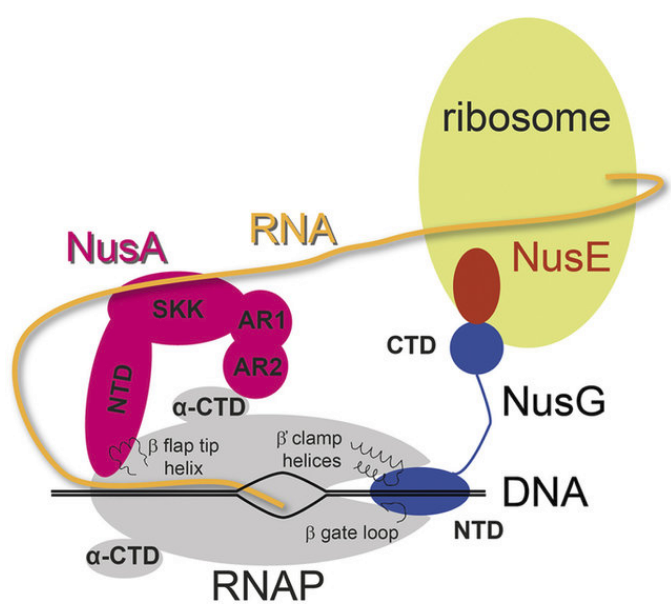
https://www.nature.com/articles/srep16428

In [26]:
rxn = me.metabolites.get_by_id('NusA_mono')
pd.DataFrame({i: str(v) for i, v in rxn.__dict__.items()}, index=['Attribute Values']).T

,Attribute Values
id,NusA_mono
name,
notes,{}
annotation,{}
_model,iJL1678b-ME
_reaction,"{<TranscriptionReaction transcription_TU0_13786_from_RpoD_mono at 0x1d73be20040>, <Transcription..."
formula,C2396H3836N669O775S13
compartment,c
charge,None
_constraint_sense,E


In [27]:
rxn = me.metabolites.get_by_id('NusG_mono')
pd.DataFrame({i: str(v) for i, v in rxn.__dict__.items()}, index=['Attribute Values']).T

,Attribute Values
id,NusG_mono
name,
notes,{}
annotation,{}
_model,iJL1678b-ME
_reaction,"{<TranscriptionReaction transcription_TU0_13786_from_RpoD_mono at 0x1d73be20040>, <Transcription..."
formula,C908H1430N255O266S7
compartment,c
charge,None
_constraint_sense,E


### GreA, GreB: Transcription cleavage factors

Gre proteins of prokaryotes, and SII proteins of eukaryotes and archaea, are transcription elongation factors that promote an endogenous transcript cleavage activity of RNA polymerases; this process promotes elongation through obstructive regions of DNA, including transcription pauses that act as sites of genetic regulation. https://pubmed.ncbi.nlm.nih.gov/11163202/

The transcription factor GreA inhibits break repair in Escherichia coli. GreA restarts backtracked RNA polymerase and hence promotes transcription fidelity. https://www.nature.com/articles/nature23907

In [28]:
rxn = me.metabolites.get_by_id('GreA_mono')
pd.DataFrame({i: str(v) for i, v in rxn.__dict__.items()}, index=['Attribute Values']).T

,Attribute Values
id,GreA_mono
name,
notes,{}
annotation,{}
_model,iJL1678b-ME
_reaction,"{<TranscriptionReaction transcription_TU0_13786_from_RpoD_mono at 0x1d73be20040>, <Transcription..."
formula,C772H1241N215O248S4
compartment,c
charge,None
_constraint_sense,E


In [29]:
rxn = me.metabolites.get_by_id('GreB_mono')
pd.DataFrame({i: str(v) for i, v in rxn.__dict__.items()}, index=['Attribute Values']).T

,Attribute Values
id,GreB_mono
name,
notes,{}
annotation,{}
_model,iJL1678b-ME
_reaction,"{<TranscriptionReaction transcription_TU0_13786_from_RpoD_mono at 0x1d73be20040>, <Transcription..."
formula,C833H1304N228O245S3
compartment,c
charge,None
_constraint_sense,E


In [30]:
rxn.reactions

frozenset({<TranscriptionReaction transcription_TU0_13786_from_RpoD_mono at 0x1d73be20040>,
           <TranscriptionReaction transcription_TU0_13103_from_RpoD_mono at 0x1d73d160040>,
           <TranscriptionReaction transcription_TU0_5186_from_RpoD_mono at 0x1d73bf10070>,
           <TranscriptionReaction transcription_TU0_8148_from_RPOS_MONOMER at 0x1d73d240100>,
           <TranscriptionReaction transcription_TU0_1182_with_TERM0_1116_from_RpoD_mono at 0x1d73d090130>,
           <TranscriptionReaction transcription_TU0_14793_from_RPON_MONOMER at 0x1d73d420190>,
           <TranscriptionReaction transcription_TU0_8774_from_RPOH_MONOMER at 0x1d73d0501c0>,
           <TranscriptionReaction transcription_TU0_12800_from_RpoD_mono at 0x1d73d590250>,
           <TranscriptionReaction transcription_TU0_5121_from_RPOE_MONOMER at 0x1d73be60280>,
           <TranscriptionReaction transcription_TU0_12962_from_RpoD_mono at 0x1d73d050280>,
           <TranscriptionReaction transcription_TU00309_f

In [31]:
len(rxn.reactions)

1448

In [32]:
rxn = me.metabolites.get_by_id('NusG_mono')
pd.DataFrame({i: str(v) for i, v in rxn.__dict__.items()}, index=['Attribute Values']).T

,Attribute Values
id,NusG_mono
name,
notes,{}
annotation,{}
_model,iJL1678b-ME
_reaction,"{<TranscriptionReaction transcription_TU0_13786_from_RpoD_mono at 0x1d73be20040>, <Transcription..."
formula,C908H1430N255O266S7
compartment,c
charge,None
_constraint_sense,E


In [33]:
rxn.reactions

frozenset({<TranscriptionReaction transcription_TU0_13786_from_RpoD_mono at 0x1d73be20040>,
           <TranscriptionReaction transcription_TU0_13103_from_RpoD_mono at 0x1d73d160040>,
           <TranscriptionReaction transcription_TU0_5186_from_RpoD_mono at 0x1d73bf10070>,
           <TranscriptionReaction transcription_TU0_8148_from_RPOS_MONOMER at 0x1d73d240100>,
           <TranscriptionReaction transcription_TU0_1182_with_TERM0_1116_from_RpoD_mono at 0x1d73d090130>,
           <TranscriptionReaction transcription_TU0_14793_from_RPON_MONOMER at 0x1d73d420190>,
           <TranscriptionReaction transcription_TU0_8774_from_RPOH_MONOMER at 0x1d73d0501c0>,
           <TranscriptionReaction transcription_TU0_12800_from_RpoD_mono at 0x1d73d590250>,
           <TranscriptionReaction transcription_TU0_5121_from_RPOE_MONOMER at 0x1d73be60280>,
           <TranscriptionReaction transcription_TU0_12962_from_RpoD_mono at 0x1d73d050280>,
           <TranscriptionReaction transcription_TU00309_f

In [34]:
len(rxn.reactions)

1448

### Convert DNA to mRNA metabolite: transcription_TU0_6444_from_RpoD_mono

In [35]:
rxn = me.reactions.get_by_id('transcription_TU0_6444_from_RpoD_mono')
pd.DataFrame({i: str(v) for i, v in rxn.__dict__.items()}, index=['Attribute Values']).T

,Attribute Values
id,transcription_TU0_6444_from_RpoD_mono
name,
notes,{}
annotation,{}
_gene_reaction_rule,
subsystem,
_genes,set()
_metabolites,"{<RNAP RNAP70-CPLX at 0x1d73bbdcca0>: -0.00805718131069817*mu - 0.00315438648313833, <Transcribe..."
_model,iJL1678b-ME
_objective_coefficient,0.0


In [36]:
me.reactions.get_by_id('transcription_TU0_6444_from_RpoD_mono').reactants

[<RNAP RNAP70-CPLX at 0x1d73bbdcca0>,
 <Complex Mfd_mono_mod_1:mg2 at 0x1d73bbdcd90>,
 <Complex NusA_mono at 0x1d73bbdcf10>,
 <Complex NusG_mono at 0x1d73bbdcf40>,
 <Complex GreA_mono at 0x1d73bbdcee0>,
 <Complex GreB_mono at 0x1d73bbdcf70>,
 <Complex RpoZ_mono_mod_1:mg2 at 0x1d73bbdcdc0>,
 <Complex Rho_hexa_mod_3:mg2 at 0x1d73bbdcdf0>,
 <Metabolite atp_c at 0x1d73bd291c0>,
 <Metabolite h2o_c at 0x1d73bd29220>,
 <Metabolite utp_c at 0x1d73bd292e0>,
 <Metabolite ctp_c at 0x1d73bd29310>,
 <Metabolite gtp_c at 0x1d73bd29340>]

In [37]:
me.reactions.get_by_id('transcription_TU0_6444_from_RpoD_mono').products

[<TranscribedGene RNA_b4025 at 0x1d73d4732b0>,
 <Metabolite adp_c at 0x1d73bd29250>,
 <Metabolite pi_c at 0x1d73bd29280>,
 <Metabolite h_c at 0x1d73bd292b0>,
 <Metabolite ppi_c at 0x1d73bd29370>,
 <Constraint mRNA_biomass at 0x1d71a60acd0>]

In [38]:
me.reactions.get_by_id('transcription_TU0_6444_from_RpoD_mono').reaction

'4.27350427350427e-6*mu GreA_mono + 4.27350427350427e-6*mu GreB_mono + 4.27350427350427e-6*mu Mfd_mono_mod_1:mg2 + 4.27350427350427e-6*mu NusA_mono + 4.27350427350427e-6*mu NusG_mono + 0.00805718131069817*mu + 0.00315438648313833 RNAP70-CPLX + 4.27350427350427e-6*mu Rho_hexa_mod_3:mg2 + 4.27350427350427e-6*mu RpoZ_mono_mod_1:mg2 + 390.0 atp_c + 427 ctp_c + 431 gtp_c + 3.0 h2o_c + 441 utp_c --> RNA_b4025 + 3.0 adp_c + 3.0 h_c + 528.39604875 mRNA_biomass + 3.0 pi_c + 1686 ppi_c'

In [39]:
dir(me.reactions.get_by_id('transcription_TU0_6444_from_RpoD_mono'))

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_formula_to_transcript',
 '_add_or_update_demand_reaction',
 '_associate_gene',
 '_dissociate_gene',
 '_gene_reaction_rule',
 '_genes',
 '_metabolites',
 '_model',
 '_objective_coefficient',
 '_transcription_data',
 '_update_awareness',
 'add_biomass_from_subreactions',
 'add_metabolites',
 'add_subreactions',
 'annotation',
 'boundary',
 'bounds',
 'build_reaction_from_string',
 'build_reaction_string',
 'check_mass_balance',
 'check_me_mass_balance',
 'clear_metabolites',
 'copy',
 'delete',
 'gene_name_reac

In [40]:
me.metabolites.query('b4025')

[<TranscribedGene RNA_b4025 at 0x1d73d4732b0>,
 <TranslatedGene protein_b4025 at 0x1d742749b50>]

In [41]:
me.reactions.query('b4025')

[<TranslationReaction translation_b4025 at 0x1d742749100>,
 <MEReaction DM_RNA_b4025 at 0x1d743ccc0d0>]

In [42]:
pd.DataFrame({i: str(v) for i, v in me.metabolites.RNA_b4025.__dict__.items()}, 
             index=['Atribute Values']).T

,Atribute Values
id,RNA_b4025
name,
notes,{}
annotation,{}
_model,iJL1678b-ME
_reaction,"{<TranslationReaction translation_b4025 at 0x1d742749100>, <TranscriptionReaction transcription_..."
formula,C15653H17725N6131O11597P1650
compartment,c
charge,None
_constraint_sense,E


In [43]:
me.reactions.query('ACALD')

[<MEReaction DM_AACALD at 0x1d71a692280>,
 <MetabolicReaction ACALD_REV_ADHE-CPLX_mod_fe2 at 0x1d7440fe310>,
 <MetabolicReaction ACALD_FWD_ADHE-CPLX_mod_fe2 at 0x1d7440fe4c0>,
 <MetabolicReaction ACALD_REV_MHPF-MONOMER at 0x1d7440fe460>,
 <MetabolicReaction ACALD_FWD_MHPF-MONOMER at 0x1d7440fe610>,
 <MetabolicReaction ACALDtex_REV_G6700-MONOMER at 0x1d7440fe670>,
 <MetabolicReaction ACALDtex_FWD_G6700-MONOMER at 0x1d7440fe6d0>,
 <MetabolicReaction ACALDtex_REV_CPLX0-7530 at 0x1d7440fe7f0>,
 <MetabolicReaction ACALDtex_FWD_CPLX0-7530 at 0x1d7440fe820>,
 <MetabolicReaction ACALDtex_REV_CPLX0-7533 at 0x1d7440fe850>,
 <MetabolicReaction ACALDtex_FWD_CPLX0-7533 at 0x1d7440fe880>,
 <MetabolicReaction ACALDtex_REV_CPLX0-7534 at 0x1d7440fe8b0>,
 <MetabolicReaction ACALDtex_FWD_CPLX0-7534 at 0x1d7440fe8e0>,
 <MetabolicReaction ACALDtpp_REV_SPONT at 0x1d7440fe910>,
 <MetabolicReaction ACALDtpp_FWD_SPONT at 0x1d7440fe970>,
 <MetabolicReaction PACALDt2rpp_REV_CPLX_dummy at 0x1d744b4d940>,
 <Metabo

In [44]:
dir(me.reactions)

['12DGR120tipp_FWD_CPLX_dummy',
 '12DGR140tipp_FWD_CPLX_dummy',
 '12DGR141tipp_FWD_CPLX_dummy',
 '12DGR160tipp_FWD_CPLX_dummy',
 '12DGR161tipp_FWD_CPLX_dummy',
 '12DGR180tipp_FWD_CPLX_dummy',
 '12DGR181tipp_FWD_CPLX_dummy',
 '12PPDRtex_FWD_CPLX0-7530',
 '12PPDRtex_FWD_CPLX0-7533',
 '12PPDRtex_FWD_CPLX0-7534',
 '12PPDRtex_FWD_G6700-MONOMER',
 '12PPDRtex_REV_CPLX0-7530',
 '12PPDRtex_REV_CPLX0-7533',
 '12PPDRtex_REV_CPLX0-7534',
 '12PPDRtex_REV_G6700-MONOMER',
 '12PPDRtpp_FWD_CPLX_dummy',
 '12PPDRtpp_REV_CPLX_dummy',
 '12PPDStex_FWD_CPLX0-7530',
 '12PPDStex_FWD_CPLX0-7533',
 '12PPDStex_FWD_CPLX0-7534',
 '12PPDStex_FWD_G6700-MONOMER',
 '12PPDStex_REV_CPLX0-7530',
 '12PPDStex_REV_CPLX0-7533',
 '12PPDStex_REV_CPLX0-7534',
 '12PPDStex_REV_G6700-MONOMER',
 '12PPDStpp_FWD_CPLX_dummy',
 '12PPDStpp_REV_CPLX_dummy',
 '14GLUCANabcpp_FWD_ABC-16-CPLX',
 '14GLUCANtexi_FWD_CPLX0-7655',
 '23CAMPtex_FWD_CPLX0-7530',
 '23CAMPtex_FWD_CPLX0-7533',
 '23CAMPtex_FWD_CPLX0-7534',
 '23CAMPtex_FWD_G6700-MONOMER',

In [45]:
me.reactions.get_by_id('14GLUCANabcpp_FWD_ABC-16-CPLX').genes

frozenset()

In [46]:
acald_gene = me.reactions.get_by_id('14GLUCANabcpp_FWD_ABC-16-CPLX').genes
help(acald_gene)

Help on frozenset object:

class frozenset(object)
 |  frozenset() -> empty frozenset object
 |  frozenset(iterable) -> frozenset object
 |  
 |  Build an immutable unordered collection of unique elements.
 |  
 |  Methods defined here:
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __contains__(...)
 |      x.__contains__(y) <==> y in x.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __len__(self, /)
 |      Return len(self).
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __or__(self, value, /)
 |     

In [47]:
me.reactions.get_by_id('14GLUCANabcpp_FWD_ABC-16-CPLX').stoichiometric_data.stoichiometry

{'14glucan_p': -1.0,
 'h2o_c': -1.0,
 'atp_c': -1.0,
 '14glucan_c': 1.0,
 'h_c': 1.0,
 'adp_c': 1.0,
 'pi_c': 1.0}

In [48]:
me.reactions.get_by_id('14GLUCANabcpp_FWD_ABC-16-CPLX').subsystem

'Transport, Inner Membrane'

In [49]:
dir(me.reactions.get_by_id('ACALD_FWD_MHPF-MONOMER'))

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_associate_gene',
 '_complex_data',
 '_dissociate_gene',
 '_gene_reaction_rule',
 '_genes',
 '_metabolites',
 '_model',
 '_objective_coefficient',
 '_stoichiometric_data',
 '_update_awareness',
 'add_biomass_from_subreactions',
 'add_metabolites',
 'add_subreactions',
 'annotation',
 'boundary',
 'bounds',
 'build_reaction_from_string',
 'build_reaction_string',
 'check_mass_balance',
 'check_me_mass_balance',
 'clear_metabolites',
 'complex_data',
 'copy',
 'delete',
 'gene_name_reaction_rule',
 'gene_reaction_ru

In [50]:
me.reactions.get_by_id('ACALD_FWD_MHPF-MONOMER').reaction

'9.50160439674088e-6*mu MHPF-MONOMER + acald_c + coa_c + nad_c --> accoa_c + h_c + nadh_c'

In [51]:
me.reactions.get_by_id('ACALD_FWD_MHPF-MONOMER').gene_reaction_rule

''

In [52]:
me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2')

<MetabolicReaction ACALD_FWD_ADHE-CPLX_mod_fe2 at 0x1d7440fe4c0>

In [53]:
dir(me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2'))

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_associate_gene',
 '_complex_data',
 '_dissociate_gene',
 '_gene_reaction_rule',
 '_genes',
 '_metabolites',
 '_model',
 '_objective_coefficient',
 '_stoichiometric_data',
 '_update_awareness',
 'add_biomass_from_subreactions',
 'add_metabolites',
 'add_subreactions',
 'annotation',
 'boundary',
 'bounds',
 'build_reaction_from_string',
 'build_reaction_string',
 'check_mass_balance',
 'check_me_mass_balance',
 'clear_metabolites',
 'complex_data',
 'copy',
 'delete',
 'gene_name_reaction_rule',
 'gene_reaction_ru

In [54]:
me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2').reaction

'2.70502986116608e-7*mu ADHE-CPLX_mod_fe2 + acald_c + coa_c + nad_c --> accoa_c + h_c + nadh_c'

In [55]:
me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2').gene_name_reaction_rule

''

In [56]:
me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2').genes

frozenset()

In [57]:
me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2').stoichiometric_data.stoichiometry

{'accoa_c': 1.0,
 'acald_c': -1.0,
 'coa_c': -1.0,
 'h_c': 1.0,
 'nad_c': -1.0,
 'nadh_c': 1.0}

In [58]:
dir(me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2').stoichiometric_data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_model',
 '_parent_reactions',
 '_stoichiometry',
 'id',
 'lower_bound',
 'model',
 'parent_reactions',
 'stoichiometry',
 'subreactions',
 'update_parent_reactions',
 'upper_bound']

In [59]:
me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2').stoichiometric_data.parent_reactions

{<MetabolicReaction ACALD_FWD_ADHE-CPLX_mod_fe2 at 0x1d7440fe4c0>,
 <MetabolicReaction ACALD_FWD_MHPF-MONOMER at 0x1d7440fe610>,
 <MetabolicReaction ACALD_REV_ADHE-CPLX_mod_fe2 at 0x1d7440fe310>,
 <MetabolicReaction ACALD_REV_MHPF-MONOMER at 0x1d7440fe460>}

In [60]:
me_reactions = me.reactions

In [61]:
len(me_reactions)

12655

In [62]:
me_reactions

[<SummaryVariable biomass_dilution at 0x1d71a67f6d0>,
 <SummaryVariable protein_biomass_to_biomass at 0x1d71a60a970>,
 <SummaryVariable mRNA_biomass_to_biomass at 0x1d71a60a070>,
 <SummaryVariable tRNA_biomass_to_biomass at 0x1d71a60a8b0>,
 <SummaryVariable rRNA_biomass_to_biomass at 0x1d71a60ae50>,
 <SummaryVariable ncRNA_biomass_to_biomass at 0x1d71a60a790>,
 <SummaryVariable DNA_biomass_to_biomass at 0x1d71a60a550>,
 <SummaryVariable lipid_biomass_to_biomass at 0x1d71a60a1c0>,
 <SummaryVariable constituent_biomass_to_biomass at 0x1d71a692160>,
 <SummaryVariable prosthetic_group_biomass_to_biomass at 0x1d71a692d30>,
 <SummaryVariable peptidoglycan_biomass_to_biomass at 0x1d71a6920d0>,
 <MEReaction DM_4CRSOL at 0x1d71a6921f0>,
 <MEReaction DM_5DRIB at 0x1d71a692f70>,
 <MEReaction DM_AACALD at 0x1d71a692280>,
 <MEReaction DM_AMOB at 0x1d71a684130>,
 <MEReaction DM_MTHTHF at 0x1d71a6848b0>,
 <MEReaction DM_OXAM at 0x1d71a684d90>,
 <MEReaction EX_12ppd__R_e at 0x1d71a684dc0>,
 <MEReactio

In [63]:
me.reactions.query('EX_')

[<MEReaction EX_12ppd__R_e at 0x1d71a684dc0>,
 <MEReaction EX_12ppd__S_e at 0x1d71a684cd0>,
 <MEReaction EX_14glucan_e at 0x1d73b9119d0>,
 <MEReaction EX_15dap_e at 0x1d73b9119a0>,
 <MEReaction EX_23camp_e at 0x1d73ba0bfd0>,
 <MEReaction EX_23ccmp_e at 0x1d71a5e9fa0>,
 <MEReaction EX_23cgmp_e at 0x1d71a5e9310>,
 <MEReaction EX_23cump_e at 0x1d71a5e9880>,
 <MEReaction EX_23dappa_e at 0x1d71a5e9a00>,
 <MEReaction EX_26dap__M_e at 0x1d71a5e9c40>,
 <MEReaction EX_2ddglcn_e at 0x1d71a5e9f40>,
 <MEReaction EX_34dhpac_e at 0x1d71a5e9cd0>,
 <MEReaction EX_3amp_e at 0x1d71a5e9a60>,
 <MEReaction EX_3cmp_e at 0x1d71a5e9b80>,
 <MEReaction EX_3gmp_e at 0x1d71a5e9700>,
 <MEReaction EX_3hcinnm_e at 0x1d71a5e99d0>,
 <MEReaction EX_3hpp_e at 0x1d71a5e9520>,
 <MEReaction EX_3hpppn_e at 0x1d71a5e9550>,
 <MEReaction EX_3ump_e at 0x1d71a5e97c0>,
 <MEReaction EX_4abut_e at 0x1d71a5e9fd0>,
 <MEReaction EX_4hoxpacd_e at 0x1d73b950730>,
 <MEReaction EX_5dglcn_e at 0x1d73ba27910>,
 <MEReaction EX_5mtr_e at 0x1d

In [64]:
me.reactions.query('MEReaction')

[]

In [65]:
me.reactions.query('transcription')

[<TranscriptionReaction transcription_TU0_13350_from_RpoD_mono at 0x1d73bbdcc70>,
 <TranscriptionReaction transcription_TU0_7622_from_RpoD_mono at 0x1d73bd293d0>,
 <TranscriptionReaction transcription_TU00158_from_RpoD_mono at 0x1d73bd29610>,
 <TranscriptionReaction transcription_TU0_1002_from_RpoD_mono at 0x1d73bd29880>,
 <TranscriptionReaction transcription_TU0_4702_with_TERM0223_from_RpoD_mono at 0x1d73bd29a00>,
 <TranscriptionReaction transcription_TU0_4702_with_TERM0222_from_RpoD_mono at 0x1d73bd29d60>,
 <TranscriptionReaction transcription_TU0_3421_from_RPOE_MONOMER at 0x1d73bd29ee0>,
 <TranscriptionReaction transcription_TU0_14474_from_RPOH_MONOMER at 0x1d73bd3a310>,
 <TranscriptionReaction transcription_TU0_12820_from_RpoD_mono at 0x1d73bd3a5b0>,
 <TranscriptionReaction transcription_TU0_14822_from_RpoD_mono at 0x1d73bd3a7c0>,
 <TranscriptionReaction transcription_TU0_14253_with_TERM0_1039_from_RpoD_mono at 0x1d73bd3aa30>,
 <TranscriptionReaction transcription_TU0_8529_from_Rpo

In [66]:
dir(me.reactions.transcription_TU0_13350_from_RpoD_mono)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_formula_to_transcript',
 '_add_or_update_demand_reaction',
 '_associate_gene',
 '_dissociate_gene',
 '_gene_reaction_rule',
 '_genes',
 '_metabolites',
 '_model',
 '_objective_coefficient',
 '_transcription_data',
 '_update_awareness',
 'add_biomass_from_subreactions',
 'add_metabolites',
 'add_subreactions',
 'annotation',
 'boundary',
 'bounds',
 'build_reaction_from_string',
 'build_reaction_string',
 'check_mass_balance',
 'check_me_mass_balance',
 'clear_metabolites',
 'copy',
 'delete',
 'gene_name_reac

In [67]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.products

[<TranscribedGene RNA_b1623 at 0x1d73bbdce20>,
 <Metabolite adp_c at 0x1d73bd29250>,
 <Metabolite pi_c at 0x1d73bd29280>,
 <Metabolite h_c at 0x1d73bd292b0>,
 <Metabolite ppi_c at 0x1d73bd29370>,
 <Constraint mRNA_biomass at 0x1d71a60acd0>]

In [68]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.reactants

[<RNAP RNAP70-CPLX at 0x1d73bbdcca0>,
 <Complex Mfd_mono_mod_1:mg2 at 0x1d73bbdcd90>,
 <Complex NusA_mono at 0x1d73bbdcf10>,
 <Complex NusG_mono at 0x1d73bbdcf40>,
 <Complex GreA_mono at 0x1d73bbdcee0>,
 <Complex GreB_mono at 0x1d73bbdcf70>,
 <Complex RpoZ_mono_mod_1:mg2 at 0x1d73bbdcdc0>,
 <Complex Rho_hexa_mod_3:mg2 at 0x1d73bbdcdf0>,
 <Metabolite atp_c at 0x1d73bd291c0>,
 <Metabolite h2o_c at 0x1d73bd29220>,
 <Metabolite utp_c at 0x1d73bd292e0>,
 <Metabolite ctp_c at 0x1d73bd29310>,
 <Metabolite gtp_c at 0x1d73bd29340>]

In [69]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.reaction

'4.27350427350427e-6*mu GreA_mono + 4.27350427350427e-6*mu GreB_mono + 4.27350427350427e-6*mu Mfd_mono_mod_1:mg2 + 4.27350427350427e-6*mu NusA_mono + 4.27350427350427e-6*mu NusG_mono + 0.00478843159746119*mu + 0.00187467097040606 RNAP70-CPLX + 4.27350427350427e-6*mu Rho_hexa_mod_3:mg2 + 4.27350427350427e-6*mu RpoZ_mono_mod_1:mg2 + 239.0 atp_c + 266 ctp_c + 274 gtp_c + 3.0 h2o_c + 226 utp_c --> RNA_b1623 + 3.0 adp_c + 3.0 h_c + 321.640635962 mRNA_biomass + 3.0 pi_c + 1002 ppi_c'

In [70]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.transcription_data

<TranscriptionData TU0_13350_from_RpoD_mono at 0x1d73bd293a0>

In [71]:
dir(me.reactions.transcription_TU0_13350_from_RpoD_mono.transcription_data)

['RNA_polymerase',
 'RNA_products',
 'RNA_types',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_model',
 '_parent_reactions',
 'codes_stable_rna',
 'excised_bases',
 'id',
 'model',
 'nucleotide_count',
 'nucleotide_sequence',
 'parent_reactions',
 'subreactions',
 'update_parent_reactions']

In [72]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.transcription_data.RNA_products

{'RNA_b1623'}

In [73]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.transcription_data.nucleotide_sequence

'ATGATTGATACCACCCTGCCATTAACTGATATCCATCGCCACCTTGATGGCAACATTCGTCCCCAGACCATTCTTGAACTTGGCCGCCAGTATAATATCTCGCTTCCTGCACAATCCCTGGAAACACTGATTCCCCACGTTCAGGTCATTGCCAACGAACCCGATCTGGTGAGCTTTCTGACCAAACTTGACTGGGGCGTTAAAGTTCTCGCCTCTCTTGATGCCTGTCGCCGCGTGGCATTTGAAAACATTGAAGATGCAGCCCGTCACGGCCTGCACTATGTCGAGCTGCGTTTTTCACCAGGCTACATGGCAATGGCACATCAGCTGCCTGTAGCGGGTGTTGTCGAAGCGGTGATCGATGGCGTACGTGAAGGTTGCCGCACCTTTGGTGTGCAGGCGAAGCTTATCGGCATTATGAGCCGGACCTTCGGCGAAGCCGCCTGTCAGCAAGAGCTGGAGGCCTTTTTAGCCCACCGTGACCAGATTACCGCACTTGATTTAGCCGGTGATGAACTTGGTTTCCCGGGAAGTCTGTTCCTTTCTCACTTCAACCGCGCGCGTGATGCGGGCTGGCATATTACCGTCCATGCAGGCGAAGCTGCCGGGCCGGAAAGCATCTGGCAGGCGATTCGTGAACTGGGTGCGGAGCGTATTGGACATGGCGTAAAAGCCATTGAAGATCGGGCGCTGATGGATTTTCTCGCCGAGCAACAAATTGGTATTGAATCCTGTCTGACCTCCAATATTCAGACCAGCACCGTAGCAGAGCTGGCTGCACATCCGCTGAAAACGTTCCTTGAGCATGGCATTCGTGCCAGCATTAACACTGACGATCCCGGCGTACAGGGAGTGGATATCATTCACGAATATACCGTTGCCGCGCCAGCTGCTGGGTTATCCCGCGAGCAAATCCGCCAGGCACAGATTAATGGTCTGGAAATGGCTTTCCTCAGCGCTGAGGAAAAACGCGCACTGCGAGAAAAAGTCGCCGCGAAG

In [74]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.transcription_data.nucleotide_count

{'utp_c': 226, 'atp_c': 236, 'ctp_c': 266, 'gtp_c': 274}

In [75]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.transcription_data.parent_reactions

{<TranscriptionReaction transcription_TU0_13350_from_RpoD_mono at 0x1d73bbdcc70>}

In [76]:
me.reactions.transcription_TU0_13350_from_RpoD_mono.transcription_data.subreactions

defaultdict(int, {'Transcription_normal_rho_dependent': 1})

In [77]:
dir(me)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_biomass',
 '_biomass_dilution',
 '_gam',
 '_ngam',
 '_trimmed',
 '_trimmed_genes',
 '_trimmed_reactions',
 '_unmodeled_protein_fraction',
 'add_biomass_constraints_to_model',
 'add_metabolites',
 'add_reaction',
 'add_reactions',
 'annotation',
 'change_objective',
 'compartments',
 'complex_data',
 'compute_solution_error',
 'construct_attribute_vector',
 'construct_s_matrix',
 'copy',
 'description',
 'gam',
 'generic_data',
 'genes',
 'get_metabolic_flux',
 'get_transcription_flux',
 'get_translation_flux',
 'global_info',
 'id',
 'media_compositions',
 'meta

In [78]:
dir(me.process_data)

['1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER',
 '1-PFK_mod_mg2',
 '12DGR120tipp',
 '12DGR140tipp',
 '12DGR141tipp',
 '12DGR160tipp',
 '12DGR161tipp',
 '12DGR180tipp',
 '12DGR181tipp',
 '12PPDRtex',
 '12PPDRtpp',
 '12PPDStex',
 '12PPDStpp',
 '14GLUCANabcpp',
 '14GLUCANtexi',
 '2-DEHYDROPANTOATE-REDUCT-MONOMER',
 '2-ISOPROPYLMALATESYN-MONOMER',
 '2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER',
 '2-OCTAPRENYLPHENOL-HYDROX-MONOMER',
 '23CAMPtex',
 '23CCMPtex',
 '23CGMPtex',
 '23CUMPtex',
 '23DAPPAt2pp',
 '23DAPPAtex',
 '23PDE2pp',
 '23PDE4pp',
 '23PDE7pp',
 '23PDE9pp',
 '23bpg_generation',
 '26DAHtex',
 '2AGPA120tipp',
 '2AGPA140tipp',
 '2AGPA141tipp',
 '2AGPA160tipp',
 '2AGPA161tipp',
 '2AGPA180tipp',
 '2AGPA181tipp',
 '2AGPE120tipp',
 '2AGPE140tipp',
 '2AGPE141tipp',
 '2AGPE160tipp',
 '2AGPE161tipp',
 '2AGPE180tipp',
 '2AGPE181tipp',
 '2AGPEAT120',
 '2AGPEAT140',
 '2AGPEAT141',
 '2AGPEAT160',
 '2AGPEAT161',
 '2AGPEAT180',
 '2AGPEAT181',
 '2AGPG120tipp',
 '2AGPG140tipp',
 '2AGPG141tipp',
 '2AGPG1

In [79]:
dir(me.process_data.ACALD)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_model',
 '_parent_reactions',
 '_stoichiometry',
 'id',
 'lower_bound',
 'model',
 'parent_reactions',
 'stoichiometry',
 'subreactions',
 'update_parent_reactions',
 'upper_bound']

In [80]:
dir(me.transcription_data)

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [81]:
me.reactions

[<SummaryVariable biomass_dilution at 0x1d71a67f6d0>,
 <SummaryVariable protein_biomass_to_biomass at 0x1d71a60a970>,
 <SummaryVariable mRNA_biomass_to_biomass at 0x1d71a60a070>,
 <SummaryVariable tRNA_biomass_to_biomass at 0x1d71a60a8b0>,
 <SummaryVariable rRNA_biomass_to_biomass at 0x1d71a60ae50>,
 <SummaryVariable ncRNA_biomass_to_biomass at 0x1d71a60a790>,
 <SummaryVariable DNA_biomass_to_biomass at 0x1d71a60a550>,
 <SummaryVariable lipid_biomass_to_biomass at 0x1d71a60a1c0>,
 <SummaryVariable constituent_biomass_to_biomass at 0x1d71a692160>,
 <SummaryVariable prosthetic_group_biomass_to_biomass at 0x1d71a692d30>,
 <SummaryVariable peptidoglycan_biomass_to_biomass at 0x1d71a6920d0>,
 <MEReaction DM_4CRSOL at 0x1d71a6921f0>,
 <MEReaction DM_5DRIB at 0x1d71a692f70>,
 <MEReaction DM_AACALD at 0x1d71a692280>,
 <MEReaction DM_AMOB at 0x1d71a684130>,
 <MEReaction DM_MTHTHF at 0x1d71a6848b0>,
 <MEReaction DM_OXAM at 0x1d71a684d90>,
 <MEReaction EX_12ppd__R_e at 0x1d71a684dc0>,
 <MEReactio

In [82]:
me.process_data.get_by_id('ACALD').parent_reactions

{<MetabolicReaction ACALD_FWD_ADHE-CPLX_mod_fe2 at 0x1d7440fe4c0>,
 <MetabolicReaction ACALD_FWD_MHPF-MONOMER at 0x1d7440fe610>,
 <MetabolicReaction ACALD_REV_ADHE-CPLX_mod_fe2 at 0x1d7440fe310>,
 <MetabolicReaction ACALD_REV_MHPF-MONOMER at 0x1d7440fe460>}

In [83]:
me.reactions.get_by_id('ACALD_FWD_ADHE-CPLX_mod_fe2').genes

frozenset()

In [84]:
me.reactions.get_by_id('ACALD_REV_ADHE-CPLX_mod_fe2').genes

frozenset()

In [85]:
me.reactions.get_by_id('ACALD_FWD_MHPF-MONOMER').genes

frozenset()

In [86]:
me.reactions.get_by_id('ACALD_REV_MHPF-MONOMER').genes

frozenset()

In [87]:
me.reactions.query('b0351')

[<TranslationReaction translation_b0351 at 0x1d73dc35940>,
 <MEReaction DM_RNA_b0351 at 0x1d743c79040>]

In [88]:
dir(me.reactions.get_by_id('translation_b0351'))

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_formula_to_protein',
 '_associate_gene',
 '_dissociate_gene',
 '_gene_reaction_rule',
 '_genes',
 '_metabolites',
 '_model',
 '_objective_coefficient',
 '_translation_data',
 '_update_awareness',
 'add_biomass_from_subreactions',
 'add_metabolites',
 'add_subreactions',
 'annotation',
 'boundary',
 'bounds',
 'build_reaction_from_string',
 'build_reaction_string',
 'check_mass_balance',
 'check_me_mass_balance',
 'clear_metabolites',
 'copy',
 'delete',
 'gene_name_reaction_rule',
 'gene_reaction_rule',
 'gen

In [89]:
me.reactions.get_by_id('translation_b0351').reaction

'10fthf_c + 2.72438972852433e-7*mu Def_mono_mod_1:fe2 + 1.80324164444648e-7*mu Fmt_mono_mod_mg2_mod_k + 0.00134615384615385*mu FusA_mono + 4.27350427350427e-6*mu InfA_mono + 4.45382843794892e-6*mu InfB_mono + 4.27350427350427e-6*mu InfC_mono + 1.63370183870619e-7*mu PrfB_mono + 4.27350427350427e-6*mu PrfC_mono + 0.000498399634202103*mu + 0.000195123456790123 + 0.00598079561042524*(mu + 0.3915)/mu RNA_b0351 + 2.55589556001079e-8*mu + 1.00063311174422e-8 RNA_degradosome + 2.62130898398882e-7*mu Rrf_mono + 0.00134615384615385*mu Tsf_mono + 47 ala__L_c + 15 arg__L_c + 12 asn__L_c + 17 asp__L_c + 315.0 + 1.42043895747599*(mu + 0.3915)/mu atp_c + 2 cys__L_c + 0.00134615384615385*mu generic_Tuf + 10.0 generic_tRNA_AAA_lys__L_c + 9.0 generic_tRNA_AAC_asn__L_c + 3.0 generic_tRNA_AAG_lys__L_c + 3.0 generic_tRNA_AAU_asn__L_c + 2.0 generic_tRNA_ACA_thr__L_c + 7.0 generic_tRNA_ACC_thr__L_c + 4.0 generic_tRNA_ACG_thr__L_c + 2.0 generic_tRNA_ACU_thr__L_c + generic_tRNA_AGA_arg__L_c + 2.0 generic_tRNA

In [90]:
me.reactions.get_by_id('translation_b0351').reactants

[<Metabolite met__L_c at 0x1d73d6a53d0>,
 <Metabolite h2o_c at 0x1d73bd29220>,
 <Metabolite ser__L_c at 0x1d73d6a5850>,
 <Metabolite lys__L_c at 0x1d73d6a5790>,
 <Metabolite arg__L_c at 0x1d73d6a55e0>,
 <Metabolite val__L_c at 0x1d73d6a5670>,
 <Metabolite ala__L_c at 0x1d73d6a5820>,
 <Metabolite ile__L_c at 0x1d73d6a5910>,
 <Metabolite gly_c at 0x1d73d6a5760>,
 <Metabolite asn__L_c at 0x1d73d6a57f0>,
 <Metabolite thr__L_c at 0x1d73d6a5880>,
 <Metabolite asp__L_c at 0x1d73d6a58e0>,
 <Metabolite leu__L_c at 0x1d73d6a56d0>,
 <Metabolite his__L_c at 0x1d73d6a59a0>,
 <Metabolite gln__L_c at 0x1d73d6a5940>,
 <Metabolite glu__L_c at 0x1d73d6a58b0>,
 <Metabolite pro__L_c at 0x1d73d6a5970>,
 <Metabolite phe__L_c at 0x1d73d6a56a0>,
 <Metabolite tyr__L_c at 0x1d73d6a5a00>,
 <Metabolite cys__L_c at 0x1d73d6a59d0>,
 <Metabolite trp__L_c at 0x1d73d6a5a30>,
 <Ribosome ribosome at 0x1d73d6a5a60>,
 <TranscribedGene RNA_b0351 at 0x1d73d2624f0>,
 <Metabolite atp_c at 0x1d73bd291c0>,
 <Complex RNA_degrado

In [91]:
me.reactions.get_by_id('translation_b0351').metabolites

{<Metabolite met__L_c at 0x1d73d6a53d0>: -14,
 <Metabolite h2o_c at 0x1d73bd29220>: -633.0 - 1.42043895747599*(mu + 0.3915)/mu,
 <Metabolite ser__L_c at 0x1d73d6a5850>: -16,
 <Metabolite lys__L_c at 0x1d73d6a5790>: -13,
 <Metabolite arg__L_c at 0x1d73d6a55e0>: -15,
 <Metabolite val__L_c at 0x1d73d6a5670>: -30,
 <Metabolite ala__L_c at 0x1d73d6a5820>: -47,
 <Metabolite ile__L_c at 0x1d73d6a5910>: -24,
 <Metabolite gly_c at 0x1d73d6a5760>: -25,
 <Metabolite asn__L_c at 0x1d73d6a57f0>: -12,
 <Metabolite thr__L_c at 0x1d73d6a5880>: -15,
 <Metabolite asp__L_c at 0x1d73d6a58e0>: -17,
 <Metabolite leu__L_c at 0x1d73d6a56d0>: -21,
 <Metabolite his__L_c at 0x1d73d6a59a0>: -6,
 <Metabolite gln__L_c at 0x1d73d6a5940>: -11,
 <Metabolite glu__L_c at 0x1d73d6a58b0>: -19,
 <Metabolite pro__L_c at 0x1d73d6a5970>: -16,
 <Metabolite phe__L_c at 0x1d73d6a56a0>: -5,
 <Metabolite tyr__L_c at 0x1d73d6a5a00>: -7,
 <Metabolite cys__L_c at 0x1d73d6a59d0>: -2,
 <Metabolite trp__L_c at 0x1d73d6a5a30>: -1,
 <Ribo

In [92]:
me.reactions.get_by_id('translation_b0351').annotation

{}

In [93]:
me.reactions.get_by_id('translation_b0351').id

'translation_b0351'

In [94]:
me.reactions.get_by_id('DM_RNA_b0351').reaction

'RNA_b0351 + 304.093301851 mRNA_biomass --> '

In [95]:
dir(me.metabolites.get_by_id('RNA_b0351'))

['RNA_type',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bound',
 '_constraint_sense',
 '_model',
 '_reaction',
 'annotation',
 'charge',
 'compartment',
 'copy',
 'elements',
 'formula',
 'formula_weight',
 'id',
 'left_pos',
 'model',
 'name',
 'notes',
 'nucleotide_count',
 'nucleotide_sequence',
 'reactions',
 'remove_from_me_model',
 'remove_from_model',
 'right_pos',
 'strand',
 'summary',
 'y']

In [96]:
me.metabolites.get_by_id('RNA_b0351').formula

'C9007H10236N3524O6674P951'

In [97]:
me.metabolites.get_by_id('RNA_b0351').elements

{'C': 9007, 'H': 10236, 'N': 3524, 'O': 6674, 'P': 951}

In [98]:
me.metabolites.get_by_id('RNA_b0351').formula_weight

304093.301851

In [99]:
me.metabolites.get_by_id('RNA_b0351').compartment

'c'

In [100]:
me.metabolites.get_by_id('RNA_b0351').nucleotide_sequence

'ATGAGTAAGCGTAAAGTCGCCATTATCGGTTCTGGCAACATTGGTACCGATCTGATGATTAAAATTTTGCGTCACGGTCAGCATCTGGAGATGGCGGTGATGGTTGGCATTGATCCTCAGTCCGACGGTCTGGCGCGCGCCAGACGTATGGGCGTCGCCACCACCCATGAAGGGGTGATCGGACTGATGAACATGCCTGAATTTGCTGATATCGACATTGTATTTGATGCGACCAGCGCCGGTGCTCATGTGAAAAACGATGCCGCTTTACGCGAAGCGAAACCGGATATTCGCTTAATTGACCTGACGCCTGCTGCCATCGGCCCTTACTGCGTGCCGGTGGTTAACCTCGAGGCGAACGTCGATCAACTGAACGTCAACATGGTCACCTGCGGCGGCCAGGCCACCATTCCAATGGTGGCGGCAGTTTCACGCGTGGCGCGTGTTCATTACGCCGAAATTATCGCTTCTATCGCCAGTAAATCTGCCGGACCTGGCACGCGTGCCAATATCGATGAATTTACGGAAACCACTTCCCGAGCCATTGAAGTGGTGGGCGGCGCGGCAAAAGGGAAGGCGATTATTGTGCTTAACCCAGCAGAGCCACCGTTGATGATGCGTGACACGGTGTATGTATTGAGCGACGAAGCTTCACAAGATGATATCGAAGCCTCAATCAATGAAATGGCTGAGGCGGTGCAGGCTTACGTACCGGGTTATCGCCTGAAACAGCGCGTGCAGTTTGAAGTTATCCCGCAGGATAAACCGGTCAATTTACCGGGCGTGGGGCAATTCTCCGGACTGAAAACAGCGGTCTGGCTGGAAGTCGAAGGCGCAGCGCATTATCTGCCTGCCTATGCGGGCAACCTCGACATTATGACTTCCAGTGCGCTGGCGACAGCGGAAAAAATGGCCCAGTCACTGGCGCGCAAGGCAGGAGAAGCGGCATGA'

In [101]:
me.metabolites.get_by_id('RNA_b0351').nucleotide_count

{'ump_c': 225, 'amp_c': 208, 'cmp_c': 278, 'gmp_c': 240}

In [102]:
me.metabolites.get_by_id('RNA_b0351').reactions

frozenset({<MEReaction DM_RNA_b0351 at 0x1d743c79040>,
           <TranscriptionReaction transcription_TU0_2402_from_RpoD_mono at 0x1d73d2620d0>,
           <TranslationReaction translation_b0351 at 0x1d73dc35940>})

In [103]:
me.reactions.get_by_id('transcription_TU0_2402_from_RpoD_mono').reaction

'4.27350427350427e-6*mu GreA_mono + 4.27350427350427e-6*mu GreB_mono + 4.27350427350427e-6*mu Mfd_mono_mod_1:mg2 + 4.27350427350427e-6*mu NusA_mono + 4.27350427350427e-6*mu NusG_mono + 0.0304079743060335*mu + 0.0119047219408121 RNAP70-CPLX + 4.27350427350427e-6*mu Rho_hexa_mod_3:mg2 + 4.27350427350427e-6*mu RpoZ_mono_mod_1:mg2 + 1429.0 atp_c + 1926 ctp_c + 1626 gtp_c + 3.0 h2o_c + 1385 utp_c --> RNA_b0347 + RNA_b0348 + RNA_b0349 + RNA_b0350 + RNA_b0351 + RNA_b0352 + 3.0 adp_c + 3.0 h_c + 2000.8540890519998 mRNA_biomass + 3.0 pi_c + 6363 ppi_c'

In [104]:
me.process_data.query('b3260')

[<TranslationData b3260 at 0x1d740d304f0>]

In [105]:
dir(me.reactions.get_by_id('DM_RNA_b3260'))

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_associate_gene',
 '_dissociate_gene',
 '_gene_reaction_rule',
 '_genes',
 '_metabolites',
 '_model',
 '_objective_coefficient',
 '_update_awareness',
 'add_biomass_from_subreactions',
 'add_metabolites',
 'add_subreactions',
 'annotation',
 'boundary',
 'bounds',
 'build_reaction_from_string',
 'build_reaction_string',
 'check_mass_balance',
 'check_me_mass_balance',
 'clear_metabolites',
 'copy',
 'delete',
 'gene_name_reaction_rule',
 'gene_reaction_rule',
 'genes',
 'get_coefficient',
 'get_coefficients',
 'ge

In [106]:
dir(me)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_biomass',
 '_biomass_dilution',
 '_gam',
 '_ngam',
 '_trimmed',
 '_trimmed_genes',
 '_trimmed_reactions',
 '_unmodeled_protein_fraction',
 'add_biomass_constraints_to_model',
 'add_metabolites',
 'add_reaction',
 'add_reactions',
 'annotation',
 'change_objective',
 'compartments',
 'complex_data',
 'compute_solution_error',
 'construct_attribute_vector',
 'construct_s_matrix',
 'copy',
 'description',
 'gam',
 'generic_data',
 'genes',
 'get_metabolic_flux',
 'get_transcription_flux',
 'get_translation_flux',
 'global_info',
 'id',
 'media_compositions',
 'meta

In [107]:
dir(me.process_data)

['1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER',
 '1-PFK_mod_mg2',
 '12DGR120tipp',
 '12DGR140tipp',
 '12DGR141tipp',
 '12DGR160tipp',
 '12DGR161tipp',
 '12DGR180tipp',
 '12DGR181tipp',
 '12PPDRtex',
 '12PPDRtpp',
 '12PPDStex',
 '12PPDStpp',
 '14GLUCANabcpp',
 '14GLUCANtexi',
 '2-DEHYDROPANTOATE-REDUCT-MONOMER',
 '2-ISOPROPYLMALATESYN-MONOMER',
 '2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER',
 '2-OCTAPRENYLPHENOL-HYDROX-MONOMER',
 '23CAMPtex',
 '23CCMPtex',
 '23CGMPtex',
 '23CUMPtex',
 '23DAPPAt2pp',
 '23DAPPAtex',
 '23PDE2pp',
 '23PDE4pp',
 '23PDE7pp',
 '23PDE9pp',
 '23bpg_generation',
 '26DAHtex',
 '2AGPA120tipp',
 '2AGPA140tipp',
 '2AGPA141tipp',
 '2AGPA160tipp',
 '2AGPA161tipp',
 '2AGPA180tipp',
 '2AGPA181tipp',
 '2AGPE120tipp',
 '2AGPE140tipp',
 '2AGPE141tipp',
 '2AGPE160tipp',
 '2AGPE161tipp',
 '2AGPE180tipp',
 '2AGPE181tipp',
 '2AGPEAT120',
 '2AGPEAT140',
 '2AGPEAT141',
 '2AGPEAT160',
 '2AGPEAT161',
 '2AGPEAT180',
 '2AGPEAT181',
 '2AGPG120tipp',
 '2AGPG140tipp',
 '2AGPG141tipp',
 '2AGPG1

In [108]:
me.process_data.query('b3260')

[<TranslationData b3260 at 0x1d740d304f0>]

In [109]:
dir(me.process_data.query('b3260'))

['__add__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__delslice__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getslice__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__setslice__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check',
 '_dict',
 '_extend_nocheck',
 '_generate_index',
 '_replace_on_id',
 'append',
 'b3260',
 'clear',
 'copy',
 'count',
 'extend',
 'get_by_id',
 'has_id',
 'index',
 'insert',
 'list_attr',
 'pop',
 'query',
 'remove',
 'reverse',
 'sort',
 'union']

In [110]:
dir(me.process_data.b3260)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_itercodons',
 '_model',
 '_parent_reactions',
 'add_elongation_subreactions',
 'add_initiation_subreactions',
 'add_termination_subreactions',
 'amino_acid_count',
 'amino_acid_sequence',
 'codon_count',
 'first_codon',
 'id',
 'last_codon',
 'mRNA',
 'model',
 'nucleotide_sequence',
 'parent_reactions',
 'protein',
 'subreactions',
 'subreactions_from_sequence',
 'update_parent_reactions']

In [111]:
me.process_data.b3260.nucleotide_sequence

'ATGCGCATCGGACAATATCAGCTCAGAAATCGCCTGATCGCAGCGCCCATGGCTGGCATTACAGACAGACCTTTTCGGACGTTGTGCTACGAGATGGGAGCCGGATTGACAGTATCCGAGATGATGTCTTCTAACCCACAGGTTTGGGAAAGCGACAAATCTCGTTTACGGATGGTGCACATTGATGAACCCGGTATTCGCACCGTGCAAATTGCTGGTAGCGATCCGAAAGAAATGGCAGATGCAGCACGTATTAACGTGGAAAGCGGTGCCCAGATTATTGATATCAATATGGGTTGCCCGGCTAAAAAAGTGAATCGCAAGCTCGCAGGTTCAGCCCTCTTGCAGTACCCGGATGTCGTTAAATCGATCCTTACCGAGGTCGTCAATGCAGTGGACGTTCCTGTTACCCTGAAGATTCGCACCGGCTGGGCACCGGAACACCGTAACTGCGAAGAGATTGCCCAACTGGCTGAAGACTGTGGCATTCAGGCTCTGACCATTCATGGCCGTACACGCGCCTGTTTGTTCAATGGAGAAGCTGAGTACGACAGTATTCGGGCAGTTAAGCAGAAAGTTTCCATTCCGGTTATCGCGAATGGCGACATTACTGACCCGCTTAAAGCCAGAGCTGTGCTCGACTATACAGGGGCGGATGCCCTGATGATAGGCCGCGCAGCTCAGGGAAGACCCTGGATCTTTCGGGAAATCCAGCATTATCTGGACACTGGGGAGTTGCTGCCCCCGCTGCCTTTGGCAGAGGTTAAGCGCTTGCTTTGCGCGCACGTTCGGGAACTGCATGACTTTTATGGTCCGGCAAAAGGGTACCGAATTGCACGTAAACACGTTTCCTGGTATCTCCAGGAACACGCTCCAAATGACCAGTTTCGGCGCACATTCAACGCCATTGAGGATGCCAGCGAACAGCTGGAGGCGTTGGAGGCATACTTCGAAAATTTTGCGTAA'

In [112]:
me.process_data.b3260.amino_acid_count

defaultdict(int,
            {'met__L_c': 9,
             'arg__L_c': 25,
             'ile__L_c': 24,
             'gly_c': 20,
             'gln__L_c': 14,
             'tyr__L_c': 10,
             'leu__L_c': 27,
             'asn__L_c': 12,
             'ala__L_c': 37,
             'pro__L_c': 17,
             'thr__L_c': 13,
             'asp__L_c': 18,
             'phe__L_c': 8,
             'cys__L_c': 6,
             'glu__L_c': 23,
             'val__L_c': 20,
             'ser__L_c': 13,
             'trp__L_c': 4,
             'lys__L_c': 13,
             'his__L_c': 8})

In [113]:
me.process_data.b3260.first_codon

'AUG'

In [114]:
me.process_data.b3260.last_codon

'UAA'

In [115]:
me.process_data.b3260.mRNA

'RNA_b3260'

In [116]:
me.process_data.b3260.parent_reactions

{<TranslationReaction translation_b3260 at 0x1d740d218b0>}

In [117]:
me.process_data.b3260.protein

'protein_b3260'

In [118]:
me.process_data.b3260.subreactions

defaultdict(int,
            {'met_addition_at_AUG': 8,
             'arg_addition_at_CGC': 9,
             'ile_addition_at_AUC': 7,
             'gly_addition_at_GGA': 5,
             'gln_addition_at_CAA': 3,
             'tyr_addition_at_UAU': 5,
             'gln_addition_at_CAG': 11,
             'leu_addition_at_CUC': 5,
             'arg_addition_at_AGA': 4,
             'asn_addition_at_AAU': 8,
             'leu_addition_at_CUG': 10,
             'ala_addition_at_GCA': 13,
             'ala_addition_at_GCG': 6,
             'pro_addition_at_CCC': 4,
             'ala_addition_at_GCU': 9,
             'gly_addition_at_GGC': 6,
             'ile_addition_at_AUU': 16,
             'thr_addition_at_ACA': 5,
             'asp_addition_at_GAC': 11,
             'pro_addition_at_CCU': 3,
             'phe_addition_at_UUU': 5,
             'arg_addition_at_CGG': 6,
             'thr_addition_at_ACG': 1,
             'leu_addition_at_UUG': 8,
             'cys_addition_at_UGC': 4,
   

In [119]:
me.process_data.b3260.subreactions_from_sequence

{'met_addition_at_AUG': 8,
 'arg_addition_at_CGC': 9,
 'ile_addition_at_AUC': 7,
 'gly_addition_at_GGA': 5,
 'gln_addition_at_CAA': 3,
 'tyr_addition_at_UAU': 5,
 'gln_addition_at_CAG': 11,
 'leu_addition_at_CUC': 5,
 'arg_addition_at_AGA': 4,
 'asn_addition_at_AAU': 8,
 'leu_addition_at_CUG': 10,
 'ala_addition_at_GCA': 13,
 'ala_addition_at_GCG': 6,
 'pro_addition_at_CCC': 4,
 'ala_addition_at_GCU': 9,
 'gly_addition_at_GGC': 6,
 'ile_addition_at_AUU': 16,
 'thr_addition_at_ACA': 5,
 'asp_addition_at_GAC': 11,
 'pro_addition_at_CCU': 3,
 'phe_addition_at_UUU': 5,
 'arg_addition_at_CGG': 6,
 'thr_addition_at_ACG': 1,
 'leu_addition_at_UUG': 8,
 'cys_addition_at_UGC': 4,
 'tyr_addition_at_UAC': 5,
 'glu_addition_at_GAG': 10,
 'ala_addition_at_GCC': 9,
 'val_addition_at_GUA': 1,
 'ser_addition_at_UCC': 3,
 'ser_addition_at_UCU': 3,
 'asn_addition_at_AAC': 4,
 'pro_addition_at_CCA': 2,
 'val_addition_at_GUU': 10,
 'trp_addition_at_UGG': 4,
 'glu_addition_at_GAA': 13,
 'ser_addition_at_AG

In [120]:
me.process_data.b3260._parent_reactions

{'translation_b3260'}

In [121]:
me.process_data.b3260.id

'b3260'

In [122]:
me.process_data.query('TU00021')

[<TranscriptionData TU00021_with_FIST_from_RpoD_mono at 0x1d73d698a90>]

In [123]:
dir(me.process_data.TU00021_with_FIST_from_RpoD_mono)

['RNA_polymerase',
 'RNA_products',
 'RNA_types',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_model',
 '_parent_reactions',
 'codes_stable_rna',
 'excised_bases',
 'id',
 'model',
 'nucleotide_count',
 'nucleotide_sequence',
 'parent_reactions',
 'subreactions',
 'update_parent_reactions']

In [124]:
me.process_data.TU00021_with_FIST_from_RpoD_mono.RNA_polymerase

'RNAP70-CPLX'

In [125]:
me.process_data.TU00021_with_FIST_from_RpoD_mono.RNA_products

{'RNA_b3260'}

In [126]:
me.process_data.TU00021_with_FIST_from_RpoD_mono.codes_stable_rna

False

In [127]:
me.process_data.TU00021_with_FIST_from_RpoD_mono.excised_bases

{}

In [128]:
me.process_data.TU00021_with_FIST_from_RpoD_mono.parent_reactions

{<TranscriptionReaction transcription_TU00021_with_FIST_from_RpoD_mono at 0x1d73d6989a0>}

In [129]:
me.reactions.transcription_TU00021_with_FIST_from_RpoD_mono

<TranscriptionReaction transcription_TU00021_with_FIST_from_RpoD_mono at 0x1d73d6989a0>

In [130]:
me.process_data.TU00021_with_FIST_from_RpoD_mono.nucleotide_sequence

'GCCTTGCAGTCACAGTATGGTCATTTCTTAACTCATGCGCATCGGACAATATCAGCTCAGAAATCGCCTGATCGCAGCGCCCATGGCTGGCATTACAGACAGACCTTTTCGGACGTTGTGCTACGAGATGGGAGCCGGATTGACAGTATCCGAGATGATGTCTTCTAACCCACAGGTTTGGGAAAGCGACAAATCTCGTTTACGGATGGTGCACATTGATGAACCCGGTATTCGCACCGTGCAAATTGCTGGTAGCGATCCGAAAGAAATGGCAGATGCAGCACGTATTAACGTGGAAAGCGGTGCCCAGATTATTGATATCAATATGGGTTGCCCGGCTAAAAAAGTGAATCGCAAGCTCGCAGGTTCAGCCCTCTTGCAGTACCCGGATGTCGTTAAATCGATCCTTACCGAGGTCGTCAATGCAGTGGACGTTCCTGTTACCCTGAAGATTCGCACCGGCTGGGCACCGGAACACCGTAACTGCGAAGAGATTGCCCAACTGGCTGAAGACTGTGGCATTCAGGCTCTGACCATTCATGGCCGTACACGCGCCTGTTTGTTCAATGGAGAAGCTGAGTACGACAGTATTCGGGCAGTTAAGCAGAAAGTTTCCATTCCGGTTATCGCGAATGGCGACATTACTGACCCGCTTAAAGCCAGAGCTGTGCTCGACTATACAGGGGCGGATGCCCTGATGATAGGCCGCGCAGCTCAGGGAAGACCCTGGATCTTTCGGGAAATCCAGCATTATCTGGACACTGGGGAGTTGCTGCCCCCGCTGCCTTTGGCAGAGGTTAAGCGCTTGCTTTGCGCGCACGTTCGGGAACTGCATGACTTTTATGGTCCGGCAAAAGGGTACCGAATTGCACGTAAACACGTTTCCTGGTATCTCCAGGAACACGCTCCAAATGACCAGTTTCGGCGCACATTCAACGCCATTGAGGATGCCAGCGAACAGCTGGAGGCGTTGGAGGCATACTTCGAAAATTTTGCGTA

In [131]:
me.process_data.TU00021_with_FIST_from_RpoD_mono.subreactions

defaultdict(int, {'Transcription_normal_rho_independent': 1})

In [132]:
me.process_data.TU00021_with_FIST_from_RpoD_mono._parent_reactions

{'transcription_TU00021_with_FIST_from_RpoD_mono'}

In [133]:
dir(me.reactions.transcription_TU00021_with_FIST_from_RpoD_mono)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_formula_to_transcript',
 '_add_or_update_demand_reaction',
 '_associate_gene',
 '_dissociate_gene',
 '_gene_reaction_rule',
 '_genes',
 '_metabolites',
 '_model',
 '_objective_coefficient',
 '_transcription_data',
 '_update_awareness',
 'add_biomass_from_subreactions',
 'add_metabolites',
 'add_subreactions',
 'annotation',
 'boundary',
 'bounds',
 'build_reaction_from_string',
 'build_reaction_string',
 'check_mass_balance',
 'check_me_mass_balance',
 'clear_metabolites',
 'copy',
 'delete',
 'gene_name_reac

In [134]:
me.reactions.transcription_TU00021_with_FIST_from_RpoD_mono.metabolites

{<RNAP RNAP70-CPLX at 0x1d73bbdcca0>: -0.00659962478652086*mu - 0.00258375310392292,
 <TranscribedGene RNA_b3260 at 0x1d73d698b20>: 1,
 <Complex Mfd_mono_mod_1:mg2 at 0x1d73bbdcd90>: -4.27350427350427e-6*mu,
 <Complex NusA_mono at 0x1d73bbdcf10>: -4.27350427350427e-6*mu,
 <Complex NusG_mono at 0x1d73bbdcf40>: -4.27350427350427e-6*mu,
 <Complex GreA_mono at 0x1d73bbdcee0>: -4.27350427350427e-6*mu,
 <Complex GreB_mono at 0x1d73bbdcf70>: -4.27350427350427e-6*mu,
 <Complex RpoZ_mono_mod_1:mg2 at 0x1d73bbdcdc0>: -4.27350427350427e-6*mu,
 <Metabolite utp_c at 0x1d73bd292e0>: -362,
 <Metabolite atp_c at 0x1d73bd291c0>: -323,
 <Metabolite ctp_c at 0x1d73bd29310>: -363,
 <Metabolite gtp_c at 0x1d73bd29340>: -333,
 <Metabolite ppi_c at 0x1d73bd29370>: 1381,
 <Constraint mRNA_biomass at 0x1d71a60acd0>: 309.006033806}

In [135]:
me.reactions.transcription_TU00021_with_FIST_from_RpoD_mono.products

[<TranscribedGene RNA_b3260 at 0x1d73d698b20>,
 <Metabolite ppi_c at 0x1d73bd29370>,
 <Constraint mRNA_biomass at 0x1d71a60acd0>]

In [136]:
me.reactions.transcription_TU00021_with_FIST_from_RpoD_mono.reactants

[<RNAP RNAP70-CPLX at 0x1d73bbdcca0>,
 <Complex Mfd_mono_mod_1:mg2 at 0x1d73bbdcd90>,
 <Complex NusA_mono at 0x1d73bbdcf10>,
 <Complex NusG_mono at 0x1d73bbdcf40>,
 <Complex GreA_mono at 0x1d73bbdcee0>,
 <Complex GreB_mono at 0x1d73bbdcf70>,
 <Complex RpoZ_mono_mod_1:mg2 at 0x1d73bbdcdc0>,
 <Metabolite utp_c at 0x1d73bd292e0>,
 <Metabolite atp_c at 0x1d73bd291c0>,
 <Metabolite ctp_c at 0x1d73bd29310>,
 <Metabolite gtp_c at 0x1d73bd29340>]

In [137]:
me.reactions.transcription_TU00021_with_FIST_from_RpoD_mono.subsystem

''

In [138]:
me.reactions.transcription_TU00021_with_FIST_from_RpoD_mono.transcription_data

<TranscriptionData TU00021_with_FIST_from_RpoD_mono at 0x1d73d698a90>

In [139]:
me.reactions.transcription_TU00021_with_FIST_from_RpoD_mono.variable_kind

'continuous'

In [140]:
help(me.metabolites.RNA_b3201)

Help on TranscribedGene in module cobrame.core.component object:

class TranscribedGene(MEComponent)
 |  TranscribedGene(id, rna_type, nucleotide_sequence)
 |  
 |  Metabolite class for gene created from
 |  :class:`cobrame.core.reaction.TranscriptionReaction`
 |  
 |  Parameters
 |  ----------
 |  id : str
 |      Identifier of the transcribed gene. As a best practice, this ID should
 |      be prefixed with 'RNA + _'
 |  
 |  RNA_type : str
 |      Type of RNA encoded by gene sequence (mRNA, rRNA, tRNA, or ncRNA)
 |  
 |  nucleotide_sequence : str
 |      String of base pair abbreviations for nucleotides contained in the gene
 |  
 |  Attributes
 |  ----------
 |  left_pos : int
 |      Left position of gene on the sequence of the (+) strain
 |  
 |  right_pos : int
 |      Right position of gene on the sequence of the (+) strain
 |  
 |  strand : str
 |      - (+) if the RNA product is on the leading strand
 |      - (-) if the RNA product is on the comple(mentary strand
 |  
 |  Me

In [141]:
dir(me.metabolites.RNA_b3201)

['RNA_type',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bound',
 '_constraint_sense',
 '_model',
 '_reaction',
 'annotation',
 'charge',
 'compartment',
 'copy',
 'elements',
 'formula',
 'formula_weight',
 'id',
 'left_pos',
 'model',
 'name',
 'notes',
 'nucleotide_count',
 'nucleotide_sequence',
 'reactions',
 'remove_from_me_model',
 'remove_from_model',
 'right_pos',
 'strand',
 'summary',
 'y']

In [142]:
help(me.metabolites.RNA_b3201.__dict__)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Built-in subclasses:
 |      StgDict
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>va

In [143]:
help(me.metabolites.RNA_b3201.__dict__.items())

Help on dict_items object:

class dict_items(object)
 |  Built-in subclasses:
 |      odict_items
 |  
 |  Methods defined here:
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __len__(self, /)
 |      Return len(self).
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __or__(self, value, /)
 |      Return self|value.
 |  
 |  __rand__(self, value, /)
 |      Return value&self.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __reversed__(...)
 |

In [144]:
me.metabolites.RNA_b3201.__dict__.items()

dict_items([('id', 'RNA_b3201'), ('name', ''), ('notes', {}), ('annotation', {}), ('_model', <MEModel iJL1678b-ME at 0x1d71a6a8fa0>), ('_reaction', {<TranscriptionReaction transcription_TU0_14292_from_RPOE_MONOMER at 0x1d73d1de310>, <TranscriptionReaction transcription_TU_8398_from_RPOE_MONOMER at 0x1d73d2857c0>, <TranslationReaction translation_b3201 at 0x1d740cb1040>, <MEReaction DM_RNA_b3201 at 0x1d743c50ee0>}), ('formula', 'C6890H7816N2720O5091P726'), ('compartment', 'c'), ('charge', None), ('_constraint_sense', 'E'), ('_bound', 0.0), ('left_pos', 3341965), ('right_pos', 3342691), ('strand', '+'), ('RNA_type', 'mRNA'), ('nucleotide_sequence', 'ATGGCAACATTAACTGCAAAGAACCTTGCAAAAGCCTATAAAGGCCGTCGCGTGGTAGAAGACGTCAGCCTGACCGTCAACTCCGGGGAAATTGTCGGTCTGCTGGGGCCAAACGGTGCCGGTAAGACCACCACTTTCTACATGGTTGTAGGCATTGTGCCGCGCGATGCGGGCAACATCATTATTGATGATGACGATATCAGTCTGCTGCCTCTGCATGCACGCGCGCGCCGCGGTATCGGCTATCTGCCACAGGAAGCCTCCATTTTCCGTCGCCTCAGCGTTTACGATAACCTGATGGCGGTACTGCAAATTCGTGACGACTTGTCTGCTGAACAACGTGA

In [145]:
pd.DataFrame({i: str(v) for i, v in me.metabolites.RNA_b3201.__dict__.items() if not i.startswith('_') and v}, 
             index=['Atribute Values']).T

,Atribute Values
id,RNA_b3201
formula,C6890H7816N2720O5091P726
compartment,c
left_pos,3341965
right_pos,3342691
strand,+
RNA_type,mRNA
nucleotide_sequence,ATGGCAACATTAACTGCAAAGAACCTTGCAAAAGCCTATAAAGGCCGTCGCGTGGTAGAAGACGTCAGCCTGACCGTCAACTCCGGGGAAATTGTC...


In [146]:
pd.DataFrame({i: str(v) for i, v in me.metabolites.RNA_b3201.__dict__.items()}, 
             index=['Atribute Values']).T

,Atribute Values
id,RNA_b3201
name,
notes,{}
annotation,{}
_model,iJL1678b-ME
_reaction,"{<TranscriptionReaction transcription_TU0_14292_from_RPOE_MONOMER at 0x1d73d1de310>, <Transcript..."
formula,C6890H7816N2720O5091P726
compartment,c
charge,None
_constraint_sense,E


In [147]:
me.metabolites.RNA_b3201.__dict__.items()

dict_items([('id', 'RNA_b3201'), ('name', ''), ('notes', {}), ('annotation', {}), ('_model', <MEModel iJL1678b-ME at 0x1d71a6a8fa0>), ('_reaction', {<TranscriptionReaction transcription_TU0_14292_from_RPOE_MONOMER at 0x1d73d1de310>, <TranscriptionReaction transcription_TU_8398_from_RPOE_MONOMER at 0x1d73d2857c0>, <TranslationReaction translation_b3201 at 0x1d740cb1040>, <MEReaction DM_RNA_b3201 at 0x1d743c50ee0>}), ('formula', 'C6890H7816N2720O5091P726'), ('compartment', 'c'), ('charge', None), ('_constraint_sense', 'E'), ('_bound', 0.0), ('left_pos', 3341965), ('right_pos', 3342691), ('strand', '+'), ('RNA_type', 'mRNA'), ('nucleotide_sequence', 'ATGGCAACATTAACTGCAAAGAACCTTGCAAAAGCCTATAAAGGCCGTCGCGTGGTAGAAGACGTCAGCCTGACCGTCAACTCCGGGGAAATTGTCGGTCTGCTGGGGCCAAACGGTGCCGGTAAGACCACCACTTTCTACATGGTTGTAGGCATTGTGCCGCGCGATGCGGGCAACATCATTATTGATGATGACGATATCAGTCTGCTGCCTCTGCATGCACGCGCGCGCCGCGGTATCGGCTATCTGCCACAGGAAGCCTCCATTTTCCGTCGCCTCAGCGTTTACGATAACCTGATGGCGGTACTGCAAATTCGTGACGACTTGTCTGCTGAACAACGTGA

In [148]:
me.metabolites.RNA_b3201.reactions

frozenset({<MEReaction DM_RNA_b3201 at 0x1d743c50ee0>,
           <TranscriptionReaction transcription_TU0_14292_from_RPOE_MONOMER at 0x1d73d1de310>,
           <TranscriptionReaction transcription_TU_8398_from_RPOE_MONOMER at 0x1d73d2857c0>,
           <TranslationReaction translation_b3201 at 0x1d740cb1040>})

In [149]:
rxn = me.reactions.transcription_TU_8398_from_RPOE_MONOMER
data = rxn.transcription_data
pd.DataFrame({i: str(v) for i, v in data.__dict__.items()}, index=['Atribute Values']).T

,Atribute Values
id,TU_8398_from_RPOE_MONOMER
_model,iJL1678b-ME
_parent_reactions,{'transcription_TU_8398_from_RPOE_MONOMER'}
nucleotide_sequence,ACAAACTCAGCCTTAATCTTGTGCTTGCCAGCTCACTTCTGGCCGCCAGCATTCCGGCATTTGCCGTAACCGGAGACACTGATCAGCCGATCCACA...
RNA_products,"{'RNA_b3201', 'RNA_b3202'}"
RNA_polymerase,RNAPE-CPLX
subreactions,"defaultdict(<class 'int'>, {'Transcription_normal_rho_dependent': 1})"


In [150]:
me.reactions.get_by_id('transcription_TU0_14292_from_RPOE_MONOMER').reactants

[<RNAP RNAPE-CPLX at 0x1d73bd29eb0>,
 <Complex Mfd_mono_mod_1:mg2 at 0x1d73bbdcd90>,
 <Complex NusA_mono at 0x1d73bbdcf10>,
 <Complex NusG_mono at 0x1d73bbdcf40>,
 <Complex GreA_mono at 0x1d73bbdcee0>,
 <Complex GreB_mono at 0x1d73bbdcf70>,
 <Complex RpoZ_mono_mod_1:mg2 at 0x1d73bbdcdc0>,
 <Complex Rho_hexa_mod_3:mg2 at 0x1d73bbdcdf0>,
 <Metabolite atp_c at 0x1d73bd291c0>,
 <Metabolite h2o_c at 0x1d73bd29220>,
 <Metabolite utp_c at 0x1d73bd292e0>,
 <Metabolite ctp_c at 0x1d73bd29310>,
 <Metabolite gtp_c at 0x1d73bd29340>]

In [151]:
me.reactions.get_by_id('transcription_TU0_14292_from_RPOE_MONOMER').products

[<TranscribedGene RNA_b3200 at 0x1d73d1de400>,
 <TranscribedGene RNA_b3201 at 0x1d73d1de3a0>,
 <Metabolite adp_c at 0x1d73bd29250>,
 <Metabolite pi_c at 0x1d73bd29280>,
 <Metabolite h_c at 0x1d73bd292b0>,
 <Metabolite ppi_c at 0x1d73bd29370>,
 <Constraint mRNA_biomass at 0x1d71a60acd0>]

In [152]:
me.reactions.get_by_id('transcription_TU_8398_from_RPOE_MONOMER').reactants

[<RNAP RNAPE-CPLX at 0x1d73bd29eb0>,
 <Complex Mfd_mono_mod_1:mg2 at 0x1d73bbdcd90>,
 <Complex NusA_mono at 0x1d73bbdcf10>,
 <Complex NusG_mono at 0x1d73bbdcf40>,
 <Complex GreA_mono at 0x1d73bbdcee0>,
 <Complex GreB_mono at 0x1d73bbdcf70>,
 <Complex RpoZ_mono_mod_1:mg2 at 0x1d73bbdcdc0>,
 <Complex Rho_hexa_mod_3:mg2 at 0x1d73bbdcdf0>,
 <Metabolite atp_c at 0x1d73bd291c0>,
 <Metabolite h2o_c at 0x1d73bd29220>,
 <Metabolite utp_c at 0x1d73bd292e0>,
 <Metabolite ctp_c at 0x1d73bd29310>,
 <Metabolite gtp_c at 0x1d73bd29340>]

In [153]:
me.reactions.get_by_id('transcription_TU_8398_from_RPOE_MONOMER').products

[<TranscribedGene RNA_b3201 at 0x1d73d1de3a0>,
 <TranscribedGene RNA_b3202 at 0x1d73d2859a0>,
 <Metabolite adp_c at 0x1d73bd29250>,
 <Metabolite pi_c at 0x1d73bd29280>,
 <Metabolite h_c at 0x1d73bd292b0>,
 <Metabolite ppi_c at 0x1d73bd29370>,
 <Constraint mRNA_biomass at 0x1d71a60acd0>]

In [154]:
rxn = me.reactions.translation_b2020
data = rxn.translation_data
pd.DataFrame({i: str(v) for i, v in data.__dict__.items()}, index=['Atribute Values']).T

,Atribute Values
id,b2020
_model,iJL1678b-ME
_parent_reactions,{'translation_b2020'}
mRNA,RNA_b2020
protein,protein_b2020
subreactions,"defaultdict(<class 'int'>, {'met_addition_at_AUG': 6, 'ser_addition_at_AGC': 12, 'phe_addition_a..."
nucleotide_sequence,ATGAGCTTTAACACAATCATTGACTGGAATAGCTGTACTGCGGAGCAACAACGCCAGCTGTTAATGCGCCCGGCGATTTCCGCCTCTGAAAGCATT...


In [155]:
me.reactions.get_by_id('translation_b3201').reactants

[<Metabolite met__L_c at 0x1d73d6a53d0>,
 <Metabolite h2o_c at 0x1d73bd29220>,
 <Metabolite ala__L_c at 0x1d73d6a5820>,
 <Metabolite thr__L_c at 0x1d73d6a5880>,
 <Metabolite leu__L_c at 0x1d73d6a56d0>,
 <Metabolite lys__L_c at 0x1d73d6a5790>,
 <Metabolite asn__L_c at 0x1d73d6a57f0>,
 <Metabolite tyr__L_c at 0x1d73d6a5a00>,
 <Metabolite gly_c at 0x1d73d6a5760>,
 <Metabolite arg__L_c at 0x1d73d6a55e0>,
 <Metabolite val__L_c at 0x1d73d6a5670>,
 <Metabolite glu__L_c at 0x1d73d6a58b0>,
 <Metabolite asp__L_c at 0x1d73d6a58e0>,
 <Metabolite ser__L_c at 0x1d73d6a5850>,
 <Metabolite ile__L_c at 0x1d73d6a5910>,
 <Metabolite pro__L_c at 0x1d73d6a5970>,
 <Metabolite phe__L_c at 0x1d73d6a56a0>,
 <Metabolite his__L_c at 0x1d73d6a59a0>,
 <Metabolite gln__L_c at 0x1d73d6a5940>,
 <Metabolite cys__L_c at 0x1d73d6a59d0>,
 <Ribosome ribosome at 0x1d73d6a5a60>,
 <TranscribedGene RNA_b3201 at 0x1d73d1de3a0>,
 <Metabolite atp_c at 0x1d73bd291c0>,
 <Complex RNA_degradosome at 0x1d73bd452b0>,
 <GenericComponen

In [156]:
me.reactions.get_by_id('translation_b3201').products

[<Metabolite ump_c at 0x1d73bd45610>,
 <Metabolite amp_c at 0x1d73bd45640>,
 <Metabolite cmp_c at 0x1d73bd45670>,
 <Metabolite gmp_c at 0x1d73bd456a0>,
 <Metabolite adp_c at 0x1d73bd29250>,
 <Metabolite pi_c at 0x1d73bd29280>,
 <Metabolite h_c at 0x1d73bd292b0>,
 <TranslatedGene protein_b3201 at 0x1d740cb1ac0>,
 <Metabolite gdp_c at 0x1d73d6b1790>,
 <Metabolite ppi_c at 0x1d73bd29370>,
 <Metabolite thf_c at 0x1d73d6be4f0>,
 <Metabolite for_c at 0x1d73d6beb50>,
 <Constraint protein_biomass at 0x1d71a60a7f0>]

In [157]:
me.reactions.get_by_id('DM_RNA_b3201').reaction

'RNA_b3201 + 232.66990192599997 mRNA_biomass --> '

In [158]:
help(me.metabolites.get_by_id('protein_b3201'))

Help on TranslatedGene in module cobrame.core.component object:

class TranslatedGene(MEComponent)
 |  TranslatedGene(id)
 |  
 |  Metabolite class for protein created from
 |  :class:`cobrame.core.reaction.TranslationReaction`
 |  
 |  Parameters
 |  ----------
 |  id : str
 |      Identifier of the translated protein product. Should be prefixed
 |      with "protein + _"
 |  
 |  Method resolution order:
 |      TranslatedGene
 |      MEComponent
 |      cobra.core.Metabolite.Metabolite
 |      cobra.core.Species.Species
 |      cobra.core.Object.Object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, id)
 |      id: str
 |      
 |      formula: str
 |          Chemical formula (i.e. H2O)
 |      
 |      name: str
 |          A human readable name.
 |      
 |      compartment: str or None
 |          Compartment of metabolite.
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 | 

In [159]:
pd.DataFrame({i: str(v) for i, v in me.metabolites.protein_b3201.__dict__.items()}, 
             index=['Atribute Values']).T

,Atribute Values
id,protein_b3201
name,
notes,{}
annotation,{}
_model,iJL1678b-ME
_reaction,"{<TranslationReaction translation_b3201 at 0x1d740cb1040>, <ComplexFormation formation_ABC-53-CP..."
formula,C1174H1902N343O355S5
compartment,c
charge,None
_constraint_sense,E


In [160]:
help(me.metabolites.protein_b3201)

Help on TranslatedGene in module cobrame.core.component object:

class TranslatedGene(MEComponent)
 |  TranslatedGene(id)
 |  
 |  Metabolite class for protein created from
 |  :class:`cobrame.core.reaction.TranslationReaction`
 |  
 |  Parameters
 |  ----------
 |  id : str
 |      Identifier of the translated protein product. Should be prefixed
 |      with "protein + _"
 |  
 |  Method resolution order:
 |      TranslatedGene
 |      MEComponent
 |      cobra.core.Metabolite.Metabolite
 |      cobra.core.Species.Species
 |      cobra.core.Object.Object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, id)
 |      id: str
 |      
 |      formula: str
 |          Chemical formula (i.e. H2O)
 |      
 |      name: str
 |          A human readable name.
 |      
 |      compartment: str or None
 |          Compartment of metabolite.
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 | 

In [161]:
me.metabolites.protein_b3201.reactions

frozenset({<ComplexFormation formation_ABC-53-CPLX at 0x1d743ea84f0>,
           <TranslationReaction translation_b3201 at 0x1d740cb1040>})

In [162]:
rxn = me.reactions.get_by_id('formation_ABC-53-CPLX')
data = me.process_data.get_by_id(rxn.complex_data_id)
pd.DataFrame({i: str(v) for i, v in data.__dict__.items()}, index=['Atribute Values']).T

,Atribute Values
id,ABC-53-CPLX
_model,iJL1678b-ME
_parent_reactions,"{'CLIPAabctex_FWD_ABC-53-CPLX', 'LIPAabctex_FWD_ABC-53-CPLX', 'ECA4COLIPAabctex_FWD_ABC-53-CPLX'..."
stoichiometry,"defaultdict(<class 'float'>, {'protein_b3201': 2.0, 'protein_b4261_Inner_Membrane': 1.0, 'protei..."
subreactions,{}
_complex_id,None


In [163]:
me.reactions.get_by_id('formation_ABC-53-CPLX').reaction

'protein_b3199_Inner_Membrane + protein_b3200_Periplasm + 2.0 protein_b3201 + protein_b4261_Inner_Membrane + protein_b4262_Inner_Membrane --> ABC-53-CPLX'

In [164]:
me.reactions.get_by_id('ACALD')

cobra\core\DictList.py:154 SyntaxWarning: "is" with a literal. Did you mean "=="?
cobra\core\DictList.py:154 SyntaxWarning: "is" with a literal. Did you mean "=="?


KeyError: 'ACALD'